## **Business Understanding - Entrega 1**

Você foi alocado em um time da Indicium contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).

Pergunta de negócio

* Quais os principais fatores(variáveis) influenciam no faturamento?


## Conhecendo os dados - IMDB

O dataset contem informações dos top 1000 filmes de 1920 a 2020. Devido a esse aspecto, o dataset deve concentrar boas características históricas para compreendermos o perfil de um "filme de sucesso".

#### **Importação de bibliotecas**

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.io as pio

import missingno

# Remove warnings
import warnings
warnings.filterwarnings('ignore')




---



# **Overview do Dataset**

Essa etapa serve para conhecer a estrutura do dataset, entender as características dos dados e os tratamentos que deverão ser realizados para preparar o modelo.

In [2]:
# load data
df = pd.read_csv('/content/desafio_indicium_imdb.csv')

#### **Primeiras linhas do dataset**

In [3]:
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


#### **Conhecendo todas as colunas do dataset**

In [4]:
df.columns

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

## Dicionário de variáveis


A base de dados de treinamento contém 15 colunas. Seus nomes são auto-explicativos, mas, caso haja alguma dúvida, a descrição das colunas é:

* **Series_Title** – Nome do filme
* **Released_Year** - Ano de lançamento
* **Certificate** - Classificação etária
* **Runtime** – Tempo de duração
* **Genre** - Gênero
* **IMDB_Rating** - Nota do IMDB
* **Overview** - Overview do filme
* **Meta_score** - Média ponderada de todas as críticas
* **Director** – Diretor
* **Star1** - Ator/atriz #1
* **Star2** - Ator/atriz #2
* **Star3** - Ator/atriz #3
* **Star4** - Ator/atriz #4
* **No_of_Votes** - Número de votos
* **Gross** - Faturamento

---


### **Análise exploratória dos dados (EDA)**

In [5]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df.shape[0]}")
print(f"Colunas: {df.shape[1]}")

Entradas: 999
Colunas: 16


#### **Removendo coluna "Unnamed: 0"**

In [6]:
df = df.drop(columns=["Unnamed: 0"])

In [7]:
# Visualizando os dados
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


#### **Verificando os tipos das variáveis, valores nulos e memória**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 117.2+ KB


É possível notar que:

* Há dados nulos nas colunas **Certificate**, **Meta_score** e **Gross**

* Os tipos de dados estão em sua maioria especificados como object(categóricos) e algumas variáveis que estão nesse formato serão convertidas como por exemplo as variáveis: **Released_Year**, **Runtime** e **Gross**.



#### **Tratando os tipos das variáveis**

In [9]:
# Copiar o DataFrame para preservar original (boa prática no início do EDA)
df_clean = df.copy()

# --- Tratamento dos dtypes ---

# 1. Released_Year -> numérico
df_clean['Released_Year'] = pd.to_numeric(df_clean['Released_Year'], errors='coerce').astype('Int64')

# 2. Runtime -> remover "min" e converter para inteiro
df_clean['Runtime'] = (
    df_clean['Runtime']
    .str.replace(' min', '', regex=False)
    .str.strip()
    .astype(float)
    .astype('Int64')   # pode deixar Int64 já que é tempo em minutos
)

# 3. Gross -> remover vírgulas e converter para float
df_clean['Gross'] = (
    df_clean['Gross']
    .str.replace(',', '', regex=False)
    .astype(float)
)

# --- Verificar resultado ---
print(df_clean.dtypes)
print(df_clean[['Released_Year', 'Runtime', 'Gross']].head())

Series_Title      object
Released_Year      Int64
Certificate       object
Runtime            Int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object
   Released_Year  Runtime        Gross
0           1972      175  134966411.0
1           2008      152  534858444.0
2           1974      202   57300000.0
3           1957       96    4360000.0
4           2003      201  377845905.0


---

#### **Verificação de Valores Nulos e Valores Duplicados**

A presença de valores ausentes pode distorçer a análise e atrapalhar a qualidade dos dados.

In [10]:
# porcentagem de valores nulos por coluna
(df_clean.isnull().sum() / len(df_clean) * 100).round(2)

,0
Series_Title,0.00
Released_Year,0.10
Certificate,10.11
Runtime,0.00
Genre,0.00
IMDB_Rating,0.00
Overview,0.00
Meta_score,15.72
Director,0.00
Star1,0.00


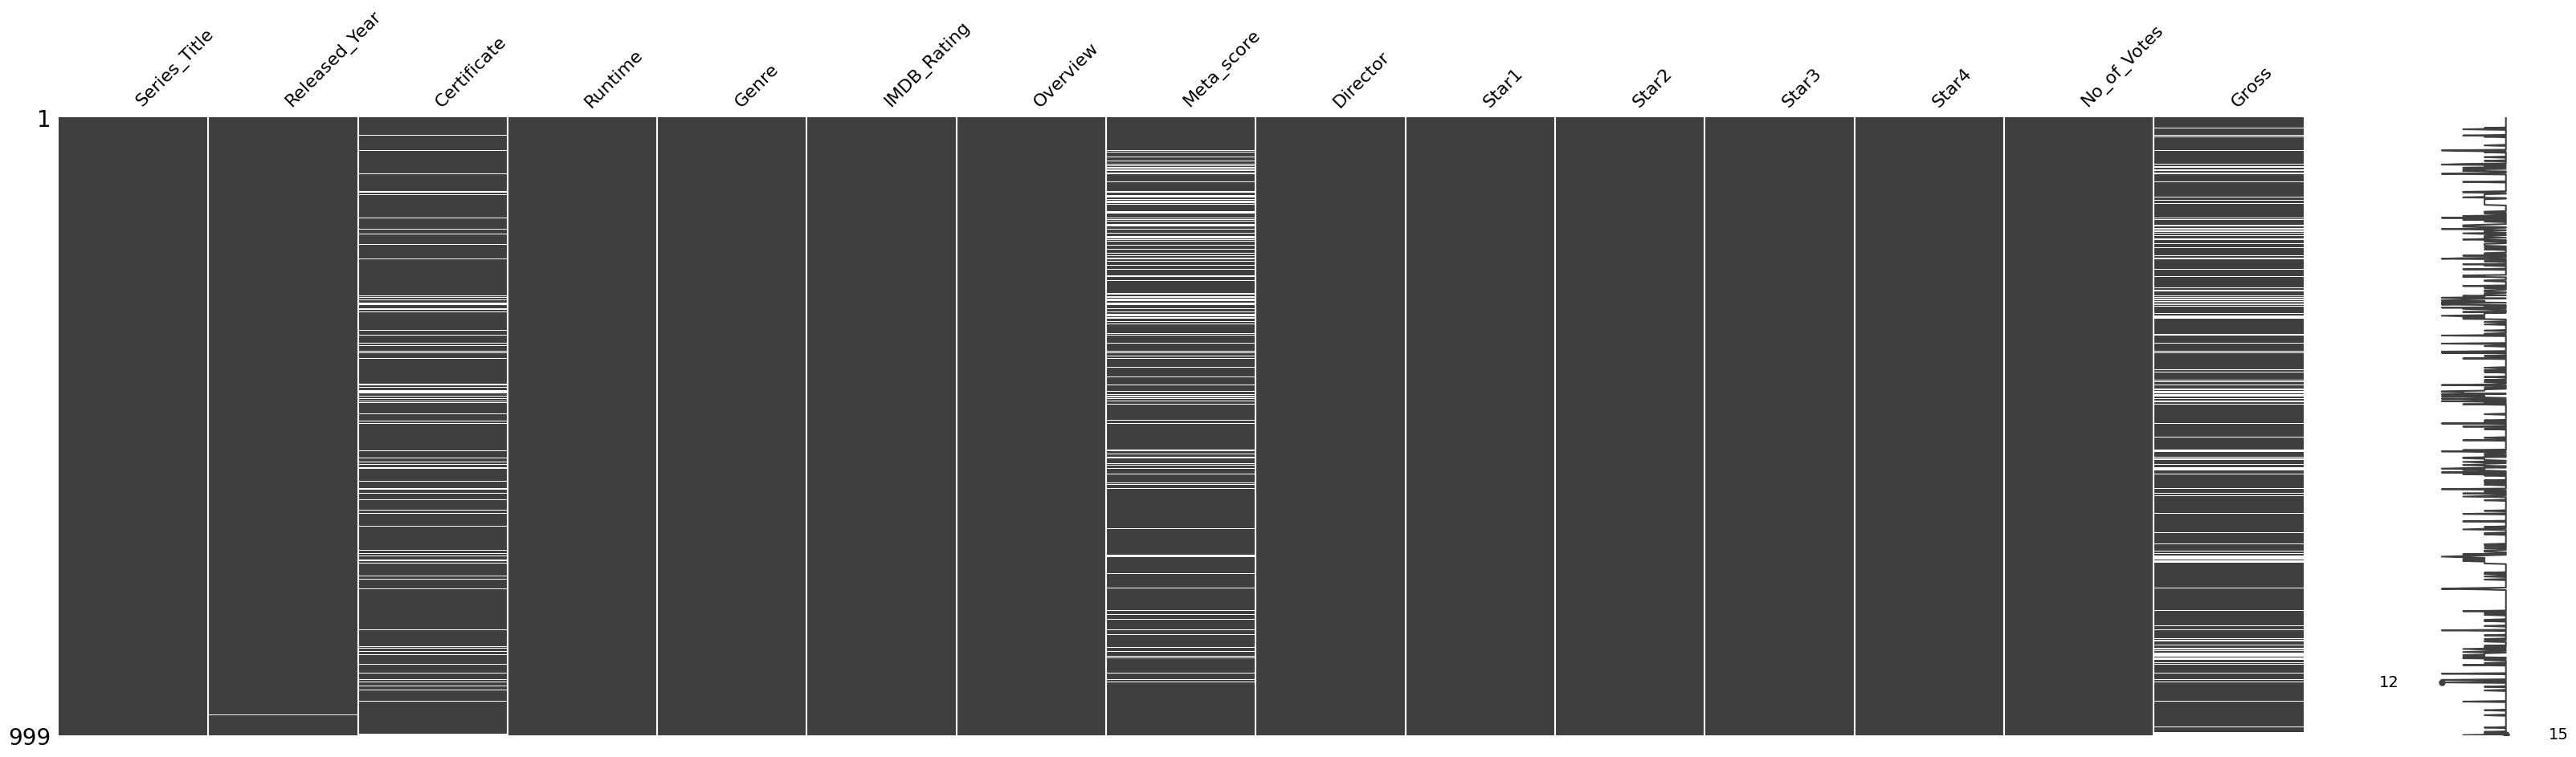

In [11]:
# Visualização de dados nulos
missingno.matrix(df_clean, figsize=(40,10));

Como foi possível deslumbar anteriormente, as colunas **Released_Year** **certificate**, **meta_score** e **Gross** possuem dados nulos.

**Released_Year**, possui menos de 0.1% de valores nulos, valor bem pequeno que pode ser por erro de digitação ou falta de informação. Possíveis ações de tratamento: podemos remover ou tentar recuperar manualmente

**Certificate**, cerca de 10% de dados nulos - Alguns filmes podem não ter recebido classificação (ex.: produções independentes ou antigas). Possíveis ações de tratamento: imputar com “Unknown” ou criar uma categoria separada (Sem classificação).

**meta_score**, possui 15.7% de dados nulos, bastante dado nulo nesse contexto - Possibilidades: crítica especializada não existe para todos os filmes (alguns filmes pequenos ou antigos podem não ter sido avaliados). Como são mais dados nulos nesse caso seria melhor imputar a mediana do que fazer drop total pois perderia dados consideráveis.  


**Gross** possui 16.9% de nulos, também um valor considerável o que pode ser devido a erros ou falta de dados confiáveis de bilheteria. Semelhante a variável anterior, **as opçoes de tratamento seriam imputar a mediana ou mesmo usar outras técnicas como KNN Imputer**.







In [12]:
if df_clean.duplicated().any():
    print("Há duplicatas no conjunto de dados.")
else:
    print("Não há duplicatas no conjunto de dados.")

Não há duplicatas no conjunto de dados.


* Não há dados duplicados



---



### **Análise Exploratória**

Para maior organização, vamos separar a análise em Colunas Numéricas e Categóricas:

### Variáveis Categóricas:

In [13]:
for column in df_clean.select_dtypes(include="object").columns:
  print(df_clean[column].value_counts())
  print("******"*10)

Series_Title
Drishyam                           2
What's Eating Gilbert Grape        1
Tombstone                          1
The Sandlot                        1
The Remains of the Day             1
                                  ..
Her                                1
Bohemian Rhapsody                  1
The Revenant                       1
The Perks of Being a Wallflower    1
The Martian                        1
Name: count, Length: 998, dtype: int64
************************************************************
Certificate
U           234
A           196
UA          175
R           146
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64
************************************************************
Genre
Drama                        84
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance 

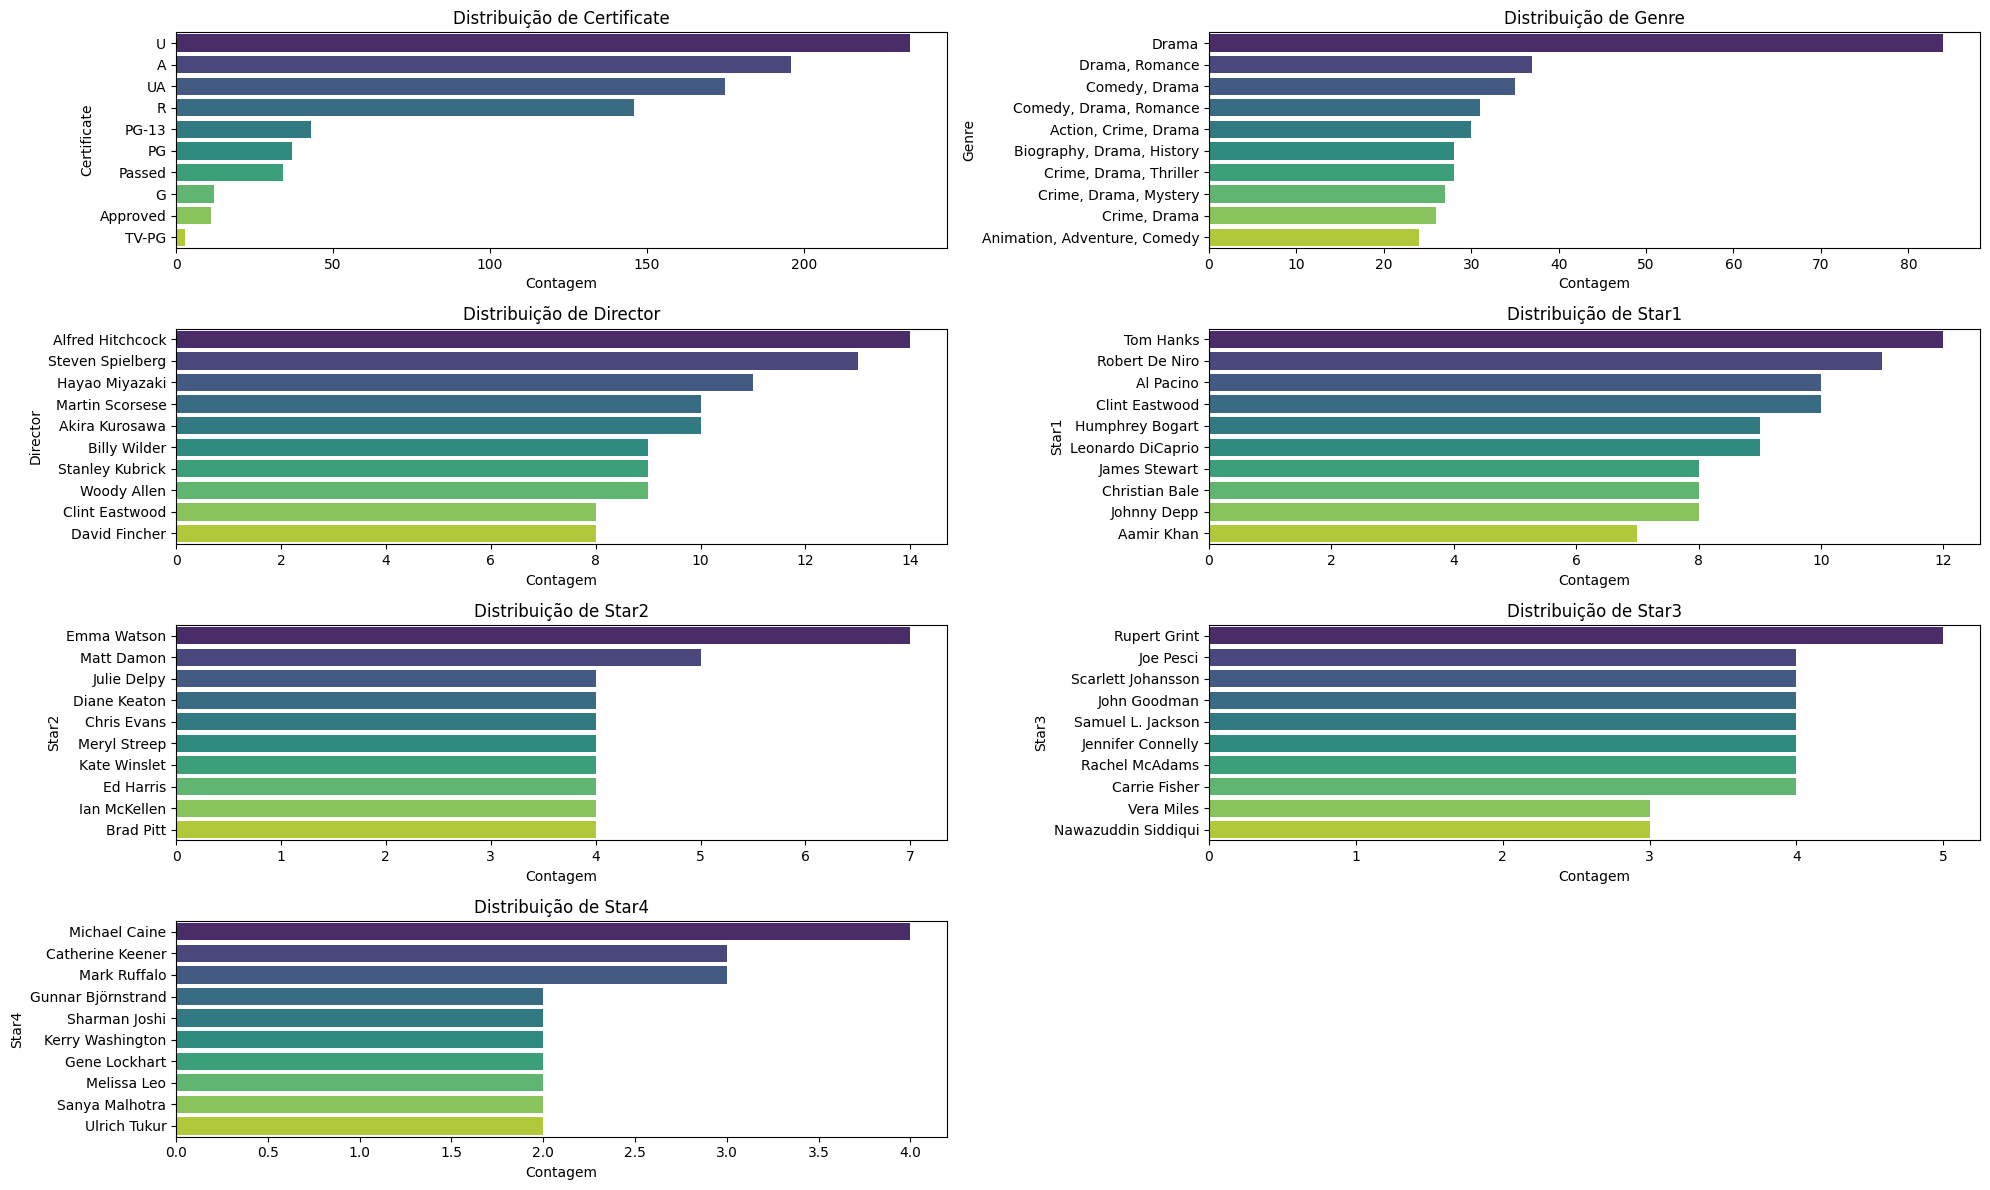

In [14]:
# Gráficos das variáveis categóricas
categorical_cols = ['Certificate',
                    'Genre', 'Director',
                    'Star1', 'Star2', 'Star3', 'Star4']


# Definir layout: 3 linhas x 4 colunas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(
        y=df[col],              # y para deixar horizontal
        order=df[col].value_counts().index[:10],  # mostra só os 10 mais comuns
        ax=axes[i],
        palette="viridis"
    )
    axes[i].set_title(f"Distribuição de {col}")
    axes[i].set_xlabel("Contagem")
    axes[i].set_ylabel(col)

# Remove gráficos vazios se o nº de colunas não for múltiplo do grid
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show();

In [15]:
# Tabela Resumo das variáveis categóricas
df_clean[categorical_cols].describe(include='object')

,Certificate,Genre,Director,Star1,Star2,Star3,Star4
count,898,999,999,999,999,999,999
unique,16,202,548,659,840,890,938
top,U,Drama,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine
freq,234,84,14,12,7,5,4


* Para facilitar a visualização dos gráficos das variáveis categóricas, optei por plotar os 10 valores (top 10) mais comuns de cada variável onde já é possível observar alguns padrões.

* Com relação a distribuição dos dados de cada uma das variáveis categóricas, é possível observar com auxílio da tabela que:

  * **Certificate**(Classificação Etária) - Posssui 16 tipos de classificação sendo o tipo U(livre) o que aparece mais vezes seguido da classificação A (equivalente a classificação Para maiores de 18 anos).

  * **Genre**(Gênero) - Possui 202 generos únicos sendo o mais comum no dataset o gênero drama seguido do gênero multiplo drama e romance.

  * **Director**(Diretor) - Há 548 diretores no dataset e o diretor Alfred Hitchcock é quem aparece mais vezes(14) seguido de Steven Spielberg(13).

  * **Star1**(Ator/Atriz) - Nesse grupo há 659 atores diferentes sendo que as maiores frequencias são de 12, 11 e 10 vezes.

  * **Star2**(Ator/Atriz) - Neste grupo há 840 atores diferentes sendo o top 3 de frequencias são 7, 5 e 4 vezes.

  * **Star3**(Ator/Atriz) - Há 890 atores diferentes neste grupo sendo as maiores frequências de 4 e 3 aparições.

  * **Star4**(Ator/Atriz) - Há 938 atores únicos, onde as maiores frquencias são 4 e 3 aparições.

### **Variáveis Numéricas**

#### **Estatísticas Descritivas**

Vamos verificar agora como está a distribuição das nossas variáveis numéricas.

In [16]:
# Tabela Resumo das variáveis numéricas
numerical_summary = df_clean.describe().transpose()

numerical_summary

,count,mean,std,min,25%,50%,75%,max
Released_Year,998.0,1991.214429,23.308539,1920.0,1976.0,1999.0,2009.0,2020.0
Runtime,999.0,122.871872,28.101227,45.0,103.0,119.0,137.0,321.0
IMDB_Rating,999.0,7.947948,0.27229,7.6,7.7,7.9,8.1,9.2
Meta_score,842.0,77.969121,12.383257,28.0,70.0,79.0,87.0,100.0
No_of_Votes,999.0,271621.422422,320912.621055,25088.0,55471.5,138356.0,373167.5,2303232.0
Gross,830.0,68082574.104819,109807553.385723,1305.0,3245338.5,23457439.5,80876340.25,936662225.0


* Observando a variável alvo **IMDB_Rating** temos que a **nota média** é de cerca 7.94 e **desvio-padrão** de 0.27 e** mediana** 7.90 menor que a média indicando uma leve distribuição assimétrica a direita devido a algumas avaliações mais altas que a maioria da distribuição.

* Para a variável **Gross** faturamento bruto, temos que a média é cerca de 68082574.10 desvio-padrão de 109807553.38 indicando uma variabilidade considerável e mediana de 23457439.50 menor que a média indicando uma **distribuição assimétrica a direita** com valores muito altos puxando a média.

Agora vamos observar as distribuições das variáveis plotando histogramas e gráficos do tipo box-plot para entender como os dados se distribuem além de observar outliers.

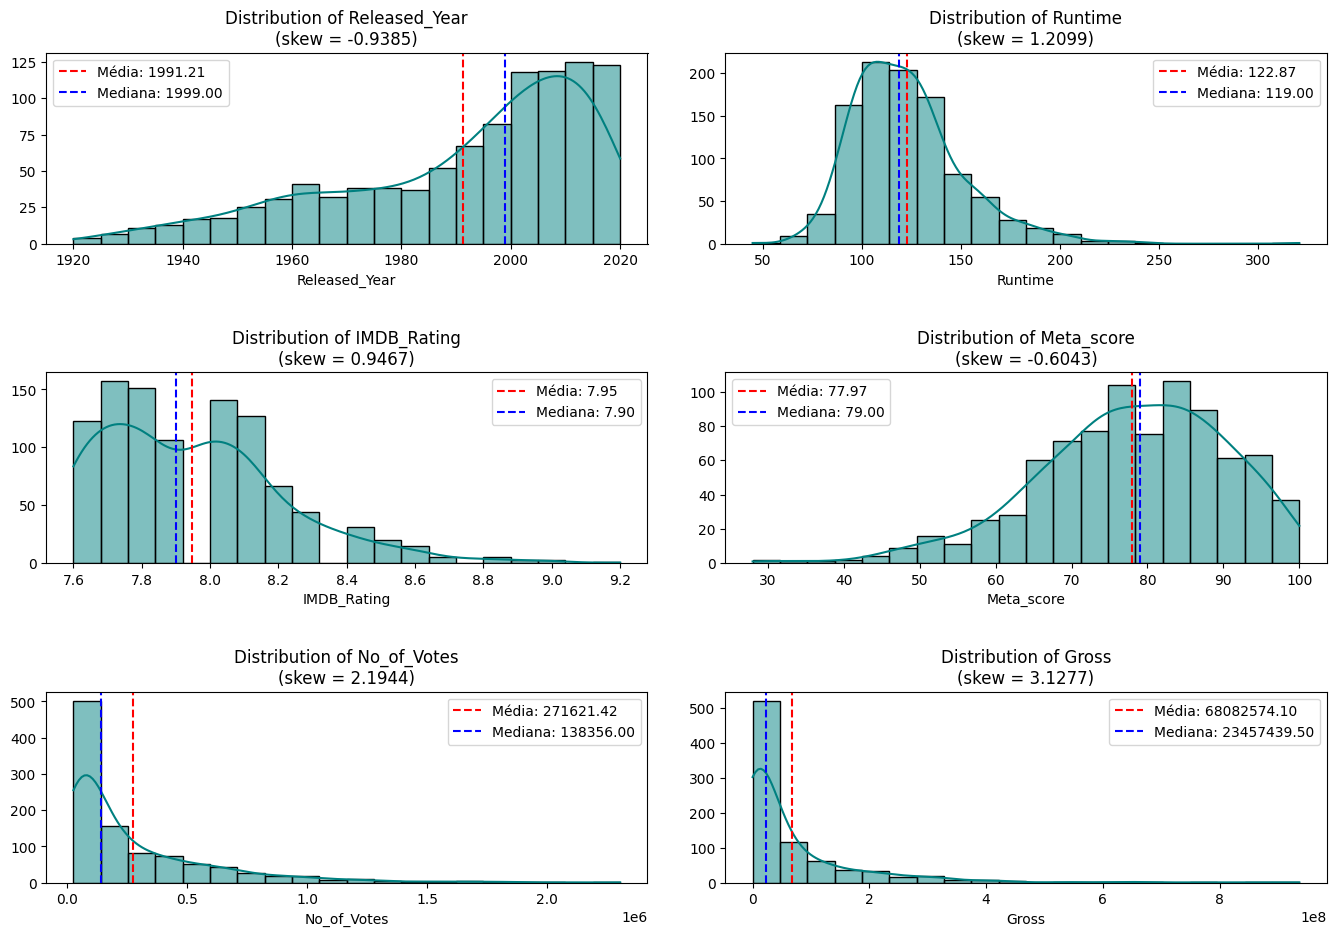

In [17]:
# Variáveis numéricas
numerical_columns = ["Released_Year", "Runtime", "IMDB_Rating",
                     "Meta_score", "No_of_Votes", "Gross"]

# Criar subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 10))  # 3 linhas, 2 colunas
axes = axes.flatten()

# Loop pelas variáveis numéricas
for i, feature in enumerate(numerical_columns):
    sns.histplot(data=df_clean, x=feature, bins=20, kde=True,
                 color='#008080', ax=axes[i])

    # Calcular média e mediana
    mean_val = df_clean[feature].mean()
    median_val = df_clean[feature].median()

    # Adicionar linhas
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Média: {mean_val:.2f}')
    axes[i].axvline(median_val, color='blue', linestyle='--', linewidth=1.5, label=f'Mediana: {median_val:.2f}')

    # Configurações do gráfico
    axes[i].set_title(f'Distribution of {feature}\n(skew = {df_clean[feature].skew():.4f})')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('')
    axes[i].legend()

# Ajustar layout
plt.tight_layout(pad=3.0)

# Salvar gráficos
#plt.savefig("distribuicao_variaveis.png", dpi=300, bbox_inches="tight")


# Mostrar na tela
plt.show()



Com base nas informações e gráficos acima podemos observar que a coluna **Released_Year** a distribuição vai de 1920 a 2020, com mediana em 1999.A maior parte dos filmes é dos anos 1970 em diante, com concentração entre 1980 e 2010.  


Em **Runtime** temos Mediana de 119 minutos (~2h), maioria entre 103 e 137 minutos. Distribuição levemente assimétrica à direita (filmes muito longos, até 321 min, puxando a cauda).


Em **IMDB_Rating** temos um intervalo mais estreito: 7.6 a 9.2, média em 7.94. pois **o dataset concentra as melhores notas.** A distribuição é levemente enviesada à direita (muitos filmes entre 7.7 e 8.2).

Do ponto de visto de negócio é uma variável que parece importante para compor a idéia de potencial produção do ponto de vista da popularidade do filme e do conjunto porem será necessário relacioná-la com outras variáveis como o faturamento, por exemplo.

Na variável **Meta_score** (crítica especializada), a média é de 77.9, com maioria entre 70 e 87.A distribuição é aproximadamente normal, com outliers para baixo (~28). **Neste conjunto de dados a crítica tende a avaliar positivamente os filmes listados sendo poucas as criticas desfavoráveis ou seja sucessos de bilheteria possuem também boa média de críticas?** Para responder essa pergunta podemos analisar a** correlação entre Gross e Meta_score**. Os filmes com meta_score mais alto podem ganhar prestígio, mas não necessariamente são os mais lucrativos(ex: filmes "Cult"), por exemplo.


Na variável **No_of_Votes** (popularidade do público) a média é de 271 mil votos, mas com alta dispersão (std ~320 mil).A distribuição é fortemente assimétrica à direita devido aos outliers. Do ponto de vista de negócios é uma variável que reflete popularidade e alcance global medindo o engajamento e o alcance do publico. Filmes com muitos votos podem indicar tendências de gênero ou atores populares que atraem mais público.


Em **Gross** (Faturamento) a média ~ 68M, mas com alta dispersão (std ~110M).A mediana: 23M, e valor máximo: quase 1 bilhão. Mesmo neste dataset temos outliers superiores. A distribuição É fortemente enviesada à direita.

Do ponto de vista de negócios:

* A maior parte dos filmes fatura até 100M (até 75% dos filmes dessa base).




---

#### **Análise e Detecção de Outliers**

Essa etapa é extremamente importante porque esses valores anômalos podem distorcer análises estatísticas e modelos de machine learning, levando a resultados imprecisos e decisões equivocadas. Ao identificar e investigar os outliers, podemos garantir a qualidade e a precisão dos dados, corrigir falhas, reduzir ruídos e descobrir insights importantes.

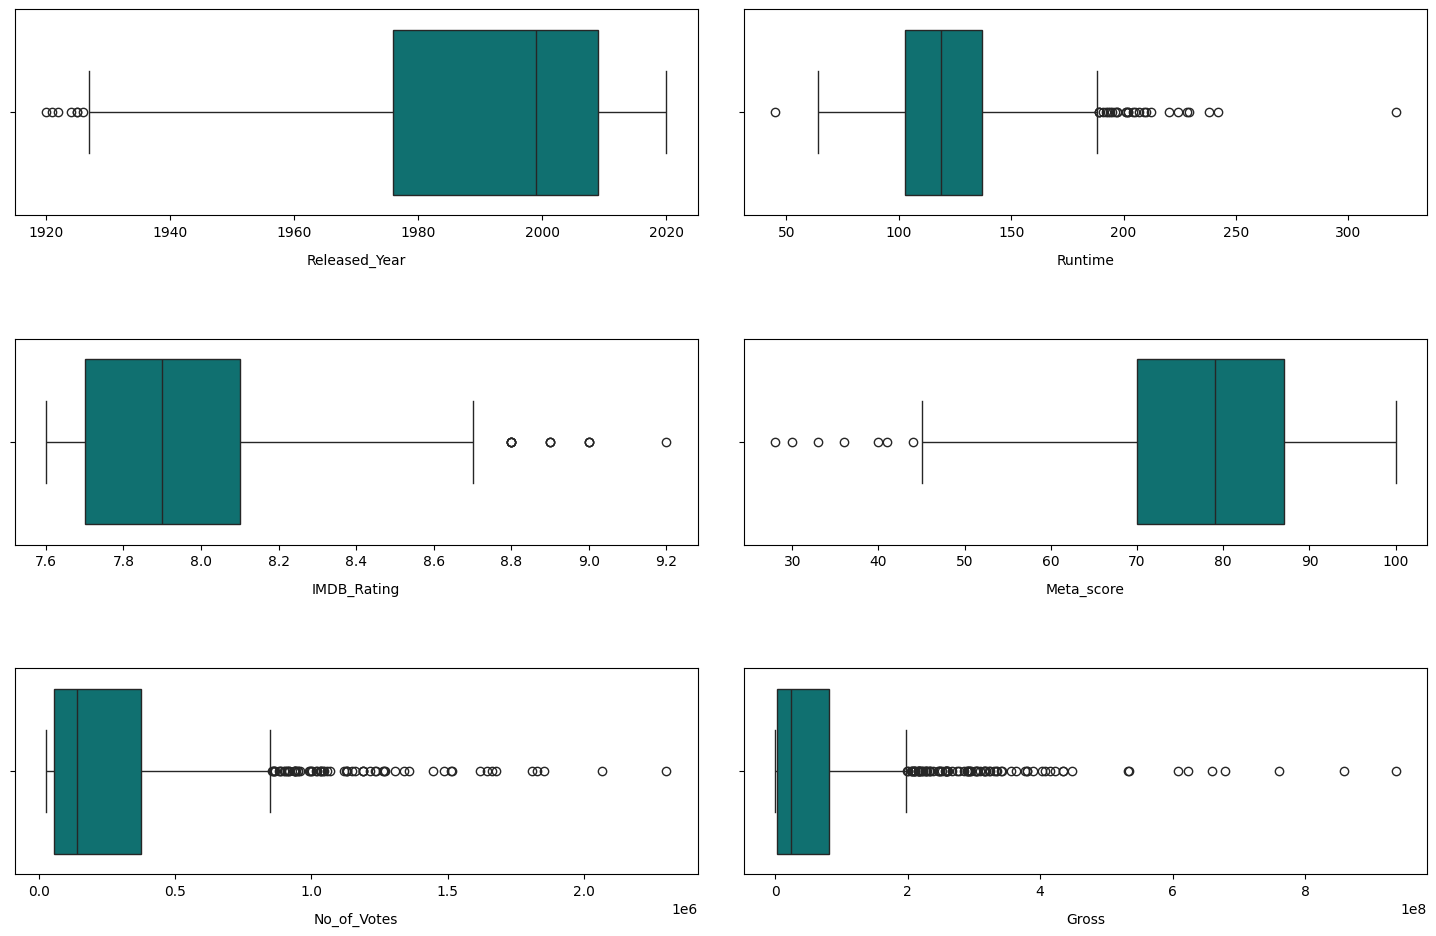

In [18]:
# visualização através de box-plot
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(numerical_columns):
    sns.boxplot(data=df_clean, x=feature, color='#008080', ax=axes[i])
    axes[i].set_xlabel(feature, fontsize=10, labelpad=10)  # labelpad dá mais espaço
    axes[i].set_ylabel("")

plt.tight_layout(pad=3.0)
plt.subplots_adjust(hspace=0.6)  # mais espaço vertical

# Salvar gráficos

#plt.savefig("boxplot_variaveis.png", dpi=300, bbox_inches="tight")


plt.show()

Há a presença de outliers nas 6 variáveis numéricas em maior e menor concentração a depender da variável sendo eles inferiores e superiores. Vamos as possíveis interpretações deles:


* **Released_Year:** alguns valores bem antigos (< 1940).

  * Não são erros, apenas filmes antigos que naturalmente destoam.

  * Talvez segmentar análise faça mais sentido que tratá-los como outliers.


* **Runtime:** há alguns filmes muito longos (> 250 min).

  * Novamente, pode ser plausível segmentar a depender da análise a ser feita (ex.: versões estendidas).

  * Só vale tratar se realmente distorcer as médias.

* **IMDB_Rating:** Possui faixa bem concentrada (~7.6 a 9). Poucos outliers leves.

  * Aqui os outliers não parecem problemáticos por isso podem ser mantidos.


* **Meta_score:** concentrado entre 60–90, mas há filmes com score muito baixo (< 40).

  * São plausíveis poís pode ser mais insight do que erro.


* **No_of_Votes:** forte assimetria (alguns filmes com > 1 milhão de votos). Ou seja, há filmes que são extremamente populares.

  * Esse é o típico caso onde transformação log pode ajudar.


  * Não faz sentido “cortar” esses filmes porque são blockbusters legítimos.

* **Gross:** a mesma coisa, valores altíssimos (> 400M) puxando a cauda.

  * Novamente, não são erros. São filmes de muito sucesso (e interessam justamente para o estudo)

  * Aqui também pode ser aplicada uma transformação logarítmica antes de aplicar a uma análise de regressão por exemplo.


---

### **Análise Bivariada**

Com as informações que temos vamos entender o comportamento do faturamento dos filmes com as variáveis categóricas

#### **Análise da variável alvo (faturamento) vs Variáveis categóricas**

**Gross vs Series_Title**

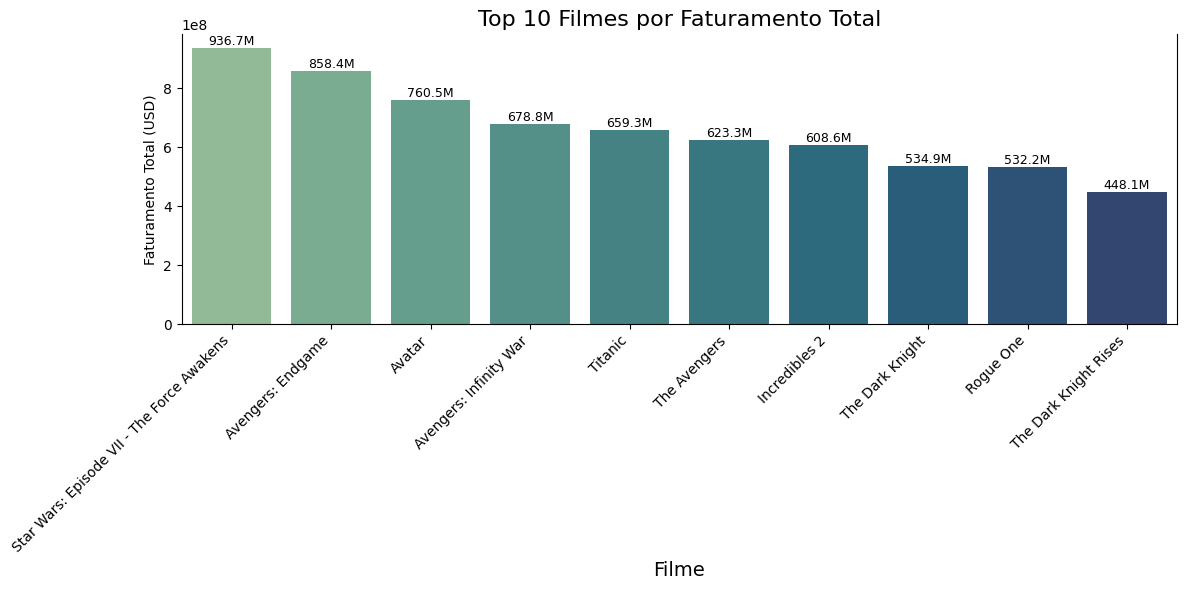

In [19]:
# Top 10 filmes por faturamento total
df_top_filmes = (
    df_clean.groupby("Series_Title")["Gross"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Series_Title",
    y="Gross",
    data=df_top_filmes,
    palette="crest"
)

# Título e rótulos
plt.title("Top 10 Filmes por Faturamento Total", fontsize=16)
plt.xlabel("Filme", fontsize=14)
plt.ylabel("Faturamento Total (USD)", fontsize=10)
plt.xticks(rotation=45, ha="right")

# Remover grades
ax.grid(False)

# Remover linha superior
ax.spines['top'].set_visible(False)

# Adicionar valores no topo das barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height()/1e6:,.1f}M',  # em milhões
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9
    )

plt.tight_layout()
plt.show()


Vamos criar uma tabela resumo para entender as principais características dos filmes com os maiores faturamentos.

**Quais as caraterísticas gerais dos filmes com os maiores faturamentos?** **(Apenas através do resumo dos dados sem análise de correlação ou teste de hipoteses, por enquanto)**

Através de uma tabela resumo podemos compreender as características dos filmes top 10 em faturamento.

In [20]:
# Ordenar pelo faturamento e selecionar os 10 maiores
top10_filmes = df_clean.sort_values(by="Gross", ascending=False).head(10)

# Selecionar apenas as colunas de interesse
top10_dataset = top10_filmes[[
    "Series_Title",
    "Released_Year",
    "Certificate",
    "Runtime",
    "Genre",
    "IMDB_Rating",
    "Meta_score",
    "No_of_Votes",
    "Gross"
]]

# Resetar índice para facilitar leitura
top10_dataset = top10_dataset.reset_index(drop=True)

# Exibir
print(top10_dataset)

                                 Series_Title  Released_Year Certificate  \
0  Star Wars: Episode VII - The Force Awakens           2015           U   
1                           Avengers: Endgame           2019          UA   
2                                      Avatar           2009          UA   
3                      Avengers: Infinity War           2018          UA   
4                                     Titanic           1997          UA   
5                                The Avengers           2012          UA   
6                               Incredibles 2           2018          UA   
7                             The Dark Knight           2008          UA   
8                                   Rogue One           2016          UA   
9                       The Dark Knight Rises           2012          UA   

   Runtime                         Genre  IMDB_Rating  Meta_score  \
0      138     Action, Adventure, Sci-Fi          7.9        80.0   
1      181      Action, A

É possível observar que:

1- **Gênero predominante**

Oito dos dez filmes são "Action, Adventure" (alguns com Sci-Fi, Drama, Crime). Apenas dois fogem um pouco: Titanic (Drama/Romance) e Incredibles 2 (animação).

-> **Isso sugere que grandes bilheterias se concentram em blockbusters de ação/aventura, voltados para grandes públicos e franquias.**

---

2- **Certificação (Classificação indicativa)**

Nove dos dez filmes são UA (adequado para a maioria das idades com supervisão), e apenas um (Star Wars VII) está como U.

-> **Filmes com grandes bilheterias tendem a buscar amplo alcance demográfico, evitando restrições severas como classificação 18+.**

---

3- **Duração (Runtime)**

O tempo varia de 118 min (Incredibles 2) até 194 min (Titanic).

A maioria está entre 138 e 164 min, ou seja, em torno de 2h20–2h40.

-> **Filmes de maior bilheteria geralmente possuem duração que permita equilibrar profundidade narrativa com filmes não muito curtos nem excessivamente longos.**

---

4- **Nota do IMDb (IMDB_Rating)**

A maioria está entre 7.6 e 8.4, com exceção de The Dark Knight (9.0).

-> **Não são necessariamente os filmes com as notas mais altas da crítica popular, mas todos têm avaliação sólida (acima de 7.5).**

---

5- **Meta_score (crítica especializada)**

A crítica destes filmes varia de 65 a 84.

Nem todos têm notas altíssimas (Infinity War 68, Rogue One 65), mas ainda sim possuem boa média

-> **Mostra que alta bilheteria não depende totalmente de aprovação crítica, mas sim de outros fatores (franquia, marketing, público fiel).**

---

6- **Número de votos (No_of_Votes)**

* Vai de 250 mil (Incredibles 2) até mais de 2.3 milhões (The Dark Knight).

* Filmes com maior bilheteria tendem a ter mais votos (talvez haja uma correlação considerável, mas não é uma relação perfeita.


-> **O engajamento (medido por votos no IMDb) acompanha em parte o sucesso de bilheteria, mas pode ser influenciado pelo tempo desde o lançamento (Titanic e The Dark Knight tiveram mais tempo para acumular votos).**

---

7- **Franquias e marcas fortes**

Oito dos dez pertencem a franquias consolidadas (Star Wars, Avengers,
Avatar, Batman, Incredibles).Somente Titanic se destaca como obra isolada (sem franquia).

-> **O dado reforça que franquias são altamente lucrativas, garantindo público fiel e interesse global.**

---

#### **Tratamento de valores nulos da Variável Categórica Certificate**

Como observamos anteriormente a variável Certificante possui cerca de 10% de valores nulos. Desta forma o preenchimento desses valores com "Unknown" me parece mais adequado e prático.

In [21]:
# Substituir valores nulos de Certificate por "Unknown"
df_clean['Certificate'] = df_clean['Certificate'].fillna("Unknown")

# Verificar se ainda existem nulos nessa coluna
print(df_clean['Certificate'].isnull().sum())

0


Verificando o estado da variável após o tratamento.

In [22]:
# Conferir as categorias para garantir que "Unknown" foi adicionado
print(df_clean['Certificate'].value_counts(dropna=False))

Certificate
U           234
A           196
UA          175
R           146
Unknown     101
PG-13        43
PG           37
Passed       34
G            12
Approved     11
TV-PG         3
GP            2
TV-14         1
Unrated       1
TV-MA         1
16            1
U/A           1
Name: count, dtype: int64




---



**Gross vs Certificate**

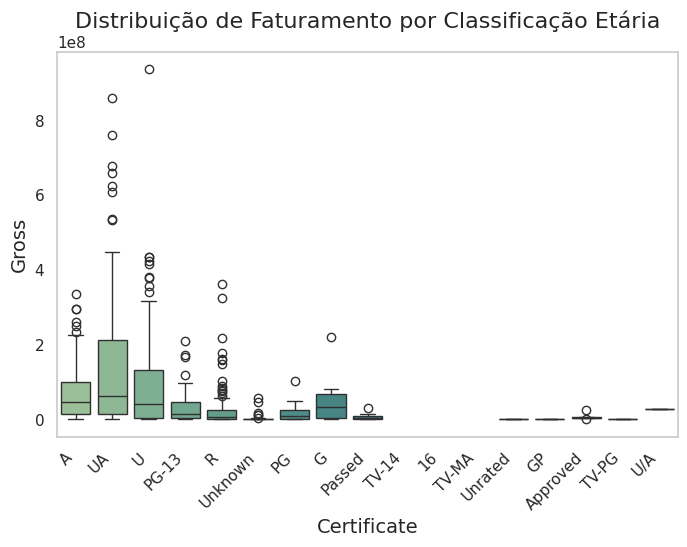

In [23]:
# boxplot for Gross for Certificate

# seetings
sns.set(style="whitegrid")

# creating box plot
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='Certificate', y='Gross', data=df_clean, palette='crest')

# remove background
ax.grid(False)

# plotting adjustments
plt.title('Distribuição de Faturamento por Classificação Etária', fontsize=16)
plt.xlabel('Certificate', fontsize=14)
plt.ylabel('Gross', fontsize=14)

plt.xticks(rotation=45, ha='right')

# show
plt.show()


É possível observar que as classificações **A**, **UA**, **U** e **PG-13** apresentam distribuições de faturamento bem mais altas e com vários outliers superiores. Essas classificações concentram boa parte dos filmes de maior bilheteria.

**R** (Restricted) - Restrito. Menores de 17 anos só com pais/responsáveis. Essa classificação possui menor distribuição de faturamento e menor mediana mas com muitos outliers que se sobressaem o que pode indicar filmes dessa classificação que estouram na bilheteria mas em média arrecadam menos que as outras classificações maiores, por exemplo.

**Gross vs Genre**

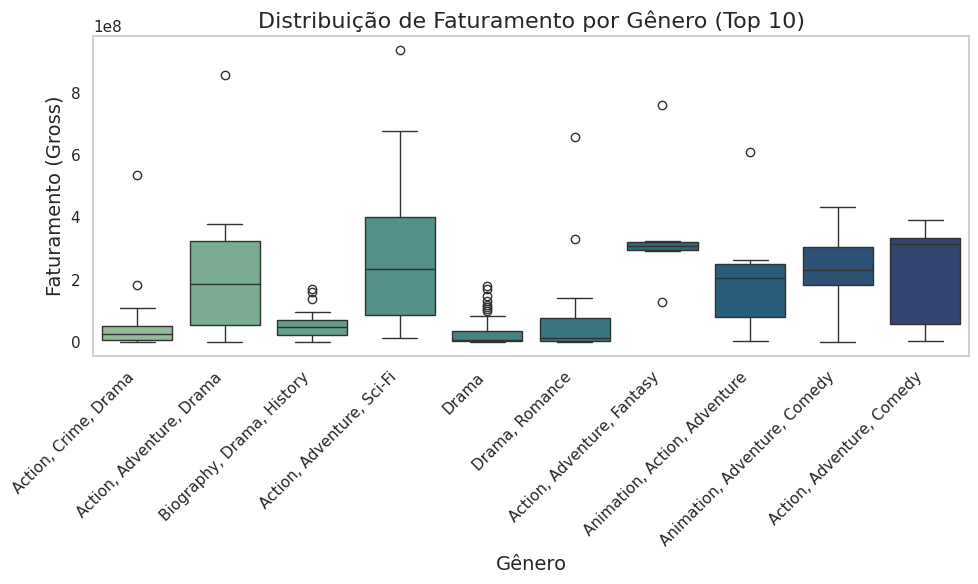

In [24]:
# Top 10 gêneros por faturamento total
top_genres = (
    df_clean.groupby("Genre")["Gross"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar apenas esses gêneros
df_top_genres = df_clean[df_clean["Genre"].isin(top_genres)]

# Boxplot para os 10 principais gêneros
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Genre', y='Gross', data=df_top_genres, palette='crest')

# Ajustes de estilo
ax.grid(False)
plt.title('Distribuição de Faturamento por Gênero (Top 10)', fontsize=16)
plt.xlabel('Gênero', fontsize=14)
plt.ylabel('Faturamento (Gross)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()



O boxplot mostra que:

* Alguns gêneros têm alta variabilidade no faturamento (ex.: **Action, Adventure, Sci-Fi), o que significa que podem render muito, mas também carregar maior risco**.

* Outros gêneros, como **Animation + Action + Adventure**, apresentam medianas altas e menos dispersão, indicando maior consistência de retorno.

* Gêneros como **Drama puro** aparecem frequentemente entre os mais produzidos, mas com faturamento mediano mais baixo e instável (é um comparativo, já que no geral todos os filmes deste dataset tiveram faturamento considerados altos pode indicar volume, mas não necessariamente lucratividade.

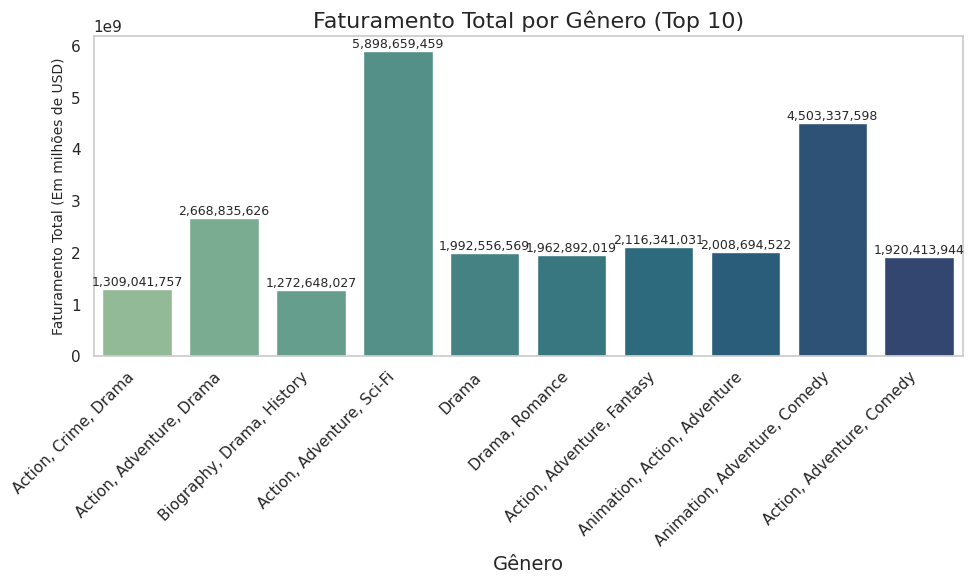

In [25]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Genre",
    y="Gross",
    data=df_top_genres,
    estimator="sum",
    ci=None,
    palette="crest"
)

# Título e rótulos
plt.title("Faturamento Total por Gênero (Top 10)", fontsize=16)
plt.xlabel("Gênero", fontsize=14)
plt.ylabel("Faturamento Total (Em milhões de USD)", fontsize=10)
plt.xticks(rotation=45, ha="right")

# Remover grades
ax.grid(False)

# Adicionar valores no topo das barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # separador de milhar
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0  # números horizontais
    )

plt.tight_layout()
plt.show()


É possível observar que:

* Gêneros como Action + Adventure + Sci-Fi e Action + Adventure + Comedy dominam em faturamento agregado, ultrapassando bilhões de dólares.

* Isso sugere que, do ponto de vista de mercado, esses gêneros têm maior potencial de atrair público em massa e gerar altos retornos financeiros.

* Porém, o total pode estar influenciado por poucos títulos de enorme sucesso (blockbusters), então é importante olhar também a distribuição.

**Gross vs Director**

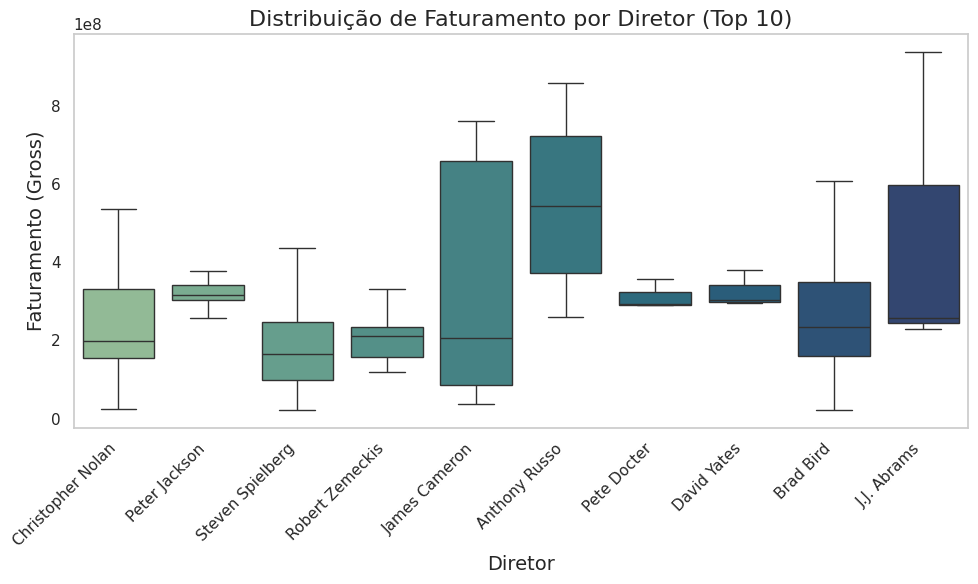

In [26]:
# Top 10 diretores por faturamento médio
top_directors = (
    df_clean.groupby("Director")["Gross"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filtrar apenas esses gêneros
top_directors = df_clean[df_clean["Director"].isin(top_directors)]

# Boxplot para os 10 principais gêneros
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Director', y='Gross', data=top_directors, palette='crest')

# Ajustes de estilo
ax.grid(False)
plt.title('Distribuição de Faturamento por Diretor (Top 10)', fontsize=16)
plt.xlabel('Diretor', fontsize=14)
plt.ylabel('Faturamento (Gross)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

* **Anthony Russo e James Cameron** apresentam distribuição mais alta e ampla, indicando que conseguem tanto grandes sucessos de bilheteria quanto alguns filmes "medianos".

* **Spielberg e Peter Jackson** têm distribuições mais concentradas, o que pode indicar maior consistência de faturamento por filme,por exemplo, mesmo que não atinjam picos extremos.

* **Christopher Nolan** mostra boa mediana e variabilidade moderada, sugerindo que, além de blockbusters, ele também possui alguns filmes com faturamento menor.

* Diretores como **Pete Docter** e **David Yates** exibem menor dispersão, o que pode significar produções mais homogêneas em termos de retorno.

* **Alguns diretores entregam resultados consistentes (baixo risco), enquanto outros oscilam mais (alto risco, mas potencial de alto retorno)**.

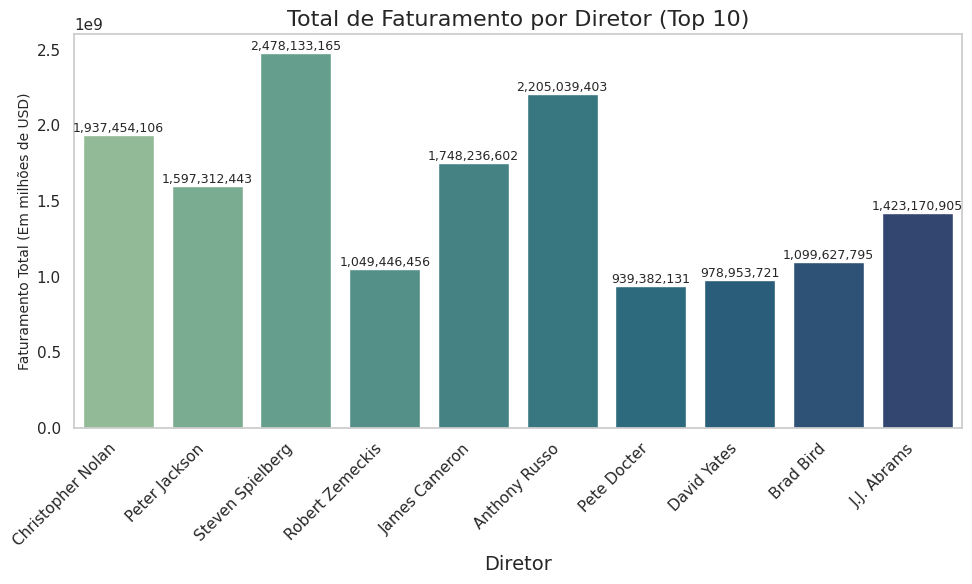

In [27]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Director",
    y="Gross",
    data=top_directors,
    estimator="sum",
    ci=None,
    palette="crest"
)

# Título e rótulos
plt.title("Total de Faturamento por Diretor (Top 10)", fontsize=16)
plt.xlabel("Diretor", fontsize=14)
plt.ylabel("Faturamento Total (Em milhões de USD)", fontsize=10)
plt.xticks(rotation=45, ha="right")

# Remover grades
ax.grid(False)

# Adicionar valores no topo das barras
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',  # separador de milhar
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=9, rotation=0  # números horizontais
    )

plt.tight_layout()
plt.show()


* **Steven Spielberg e Anthony Russo** se destacam como os diretores com maiores faturamentos totais, ultrapassando os 2 bilhões de dólares.

* **Christopher Nolan e James Cameron** também aparecem com faturamentos próximos de 2 bilhões, reforçando sua relevância comercial.

* Diretores como **Pete Docter e David Yates** têm faturamentos menores em comparação, mas ainda dentro do top 10.

-> **As análises ajudam a entender se vale mais apostar em diretores de alta consistência (segurança) ou em diretores de alta variabilidade (potencial de grandes sucessos, mas maior risco).**

**Gross vs Stars(Atores)**

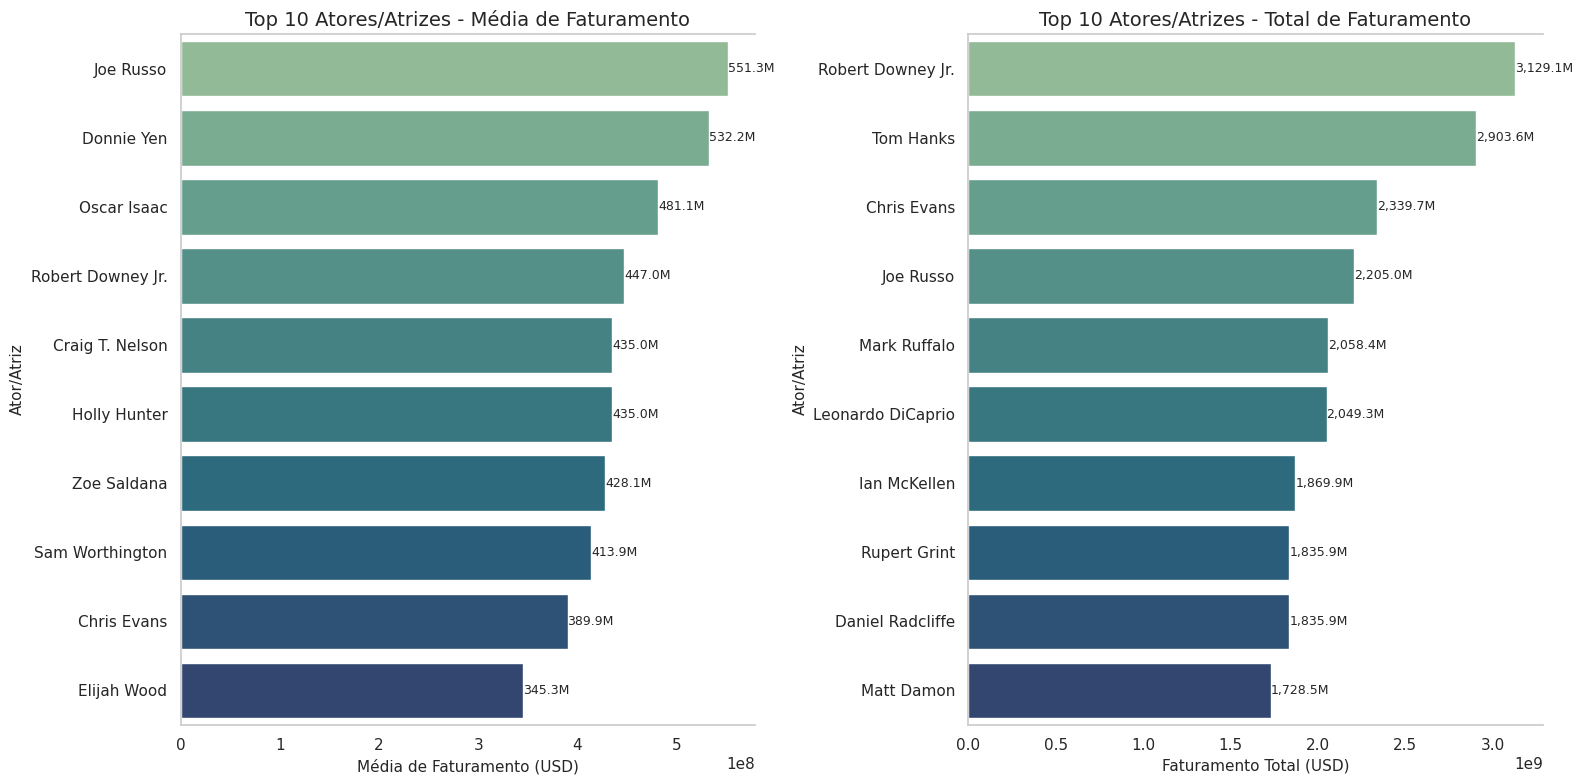

In [28]:
# Derreter colunas Star1-4 em uma só
stars = pd.melt(
    df_clean,
    id_vars=['Series_Title', 'Gross'],
    value_vars=['Star1', 'Star2', 'Star3', 'Star4'],
    var_name='Star_Position',
    value_name='Star'
)

# Contar quantos filmes cada ator participou
actor_counts = stars['Star'].value_counts()

# Filtrar apenas atores com 2 ou mais filmes
atores_validos = actor_counts[actor_counts >= 2].index
stars_filtered = stars[stars['Star'].isin(atores_validos)]

# Agrupar por ator: média e soma do faturamento
stars_grouped = stars_filtered.groupby('Star')['Gross'].agg(
    Media_Faturamento='mean',
    Total_Faturamento='sum'
).reset_index()

# Top 10 por média
top_media = stars_grouped.sort_values(by="Media_Faturamento", ascending=False).head(10)

# Top 10 por total
top_total = stars_grouped.sort_values(by="Total_Faturamento", ascending=False).head(10)

# Criar subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot média (horizontal)
sns.barplot(y="Star", x="Media_Faturamento", data=top_media, palette="crest", ax=axes[0])
axes[0].set_title("Top 10 Atores/Atrizes - Média de Faturamento", fontsize=14)
axes[0].set_xlabel("Média de Faturamento (USD)", fontsize=11)
axes[0].set_ylabel("Ator/Atriz", fontsize=11)
axes[0].grid(False)

# Anotações
for p in axes[0].patches:
    axes[0].annotate(
        f'{p.get_width()/1e6:,.1f}M',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center', fontsize=9
    )

# Plot total (horizontal)
sns.barplot(y="Star", x="Total_Faturamento", data=top_total, palette="crest", ax=axes[1])
axes[1].set_title("Top 10 Atores/Atrizes - Total de Faturamento", fontsize=14)
axes[1].set_xlabel("Faturamento Total (USD)", fontsize=11)
axes[1].set_ylabel("Ator/Atriz", fontsize=11)
axes[1].grid(False)

axes[0].spines['right'].set_visible(False)
axes[1].spines['right'].set_visible(False)

# Anotações
for p in axes[1].patches:
    axes[1].annotate(
        f'{p.get_width()/1e6:,.1f}M',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center', fontsize=9
    )

plt.tight_layout()
plt.show()


* Atores é uma variável importante e deve ser levada em conta ao pensarmos na produção de um filme.

---

#### **Tratamento de Valores Nulos da Variável Numérica Released_Year**

Como já observado, a variável ano de lançamento possui menos 0.1% de valores nulos desta forma, vamos observar qual é a linha onde o ano de lançamento está vazio.

In [29]:
# Filtrar as linhas onde Released_Year está nulo
linhas_nulas_released = df_clean[df_clean['Released_Year'].isnull()]

# Exibir essas linhas
print(linhas_nulas_released)

# Contar quantas linhas são nulas (deve bater com os 0.10% que você mencionou)
print("Quantidade de linhas nulas em Released_Year:", linhas_nulas_released.shape[0])

    Series_Title  Released_Year Certificate  Runtime  \
965    Apollo 13           <NA>           U      140   

                         Genre  IMDB_Rating  \
965  Adventure, Drama, History          7.6   

                                              Overview  Meta_score  \
965  NASA must devise a strategy to return Apollo 1...        77.0   

       Director      Star1        Star2        Star3        Star4  \
965  Ron Howard  Tom Hanks  Bill Paxton  Kevin Bacon  Gary Sinise   

     No_of_Votes        Gross  
965       269197  173837933.0  
Quantidade de linhas nulas em Released_Year: 1


O filme Apolo 13 é o único que está sem o ano de lançamento por ser somente uma linha podemos preenche-la tomando como base o próprio site do IMDB com informações sobre o filme. Fonte: https://www.imdb.com/pt/title/tt0112384/

In [30]:
# Preencher os valores nulos de Released_Year com 1995
df_clean['Released_Year'] = df_clean['Released_Year'].fillna(1995)

# Verificar se ainda existem linhas nulas
linhas_nulas_released = df_clean[df_clean['Released_Year'].isnull()]
print(linhas_nulas_released)

Empty DataFrame
Columns: [Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross]
Index: []


In [31]:
# Contar novamente as linhas nulas (deve retornar 0)
print("Quantidade de linhas nulas em Released_Year após preenchimento:", linhas_nulas_released.shape[0])

Quantidade de linhas nulas em Released_Year após preenchimento: 0




---



#### **Tratamento de Valores Nulos da Variável Numérica Meta_score**

Optou-se por preencher os valores nulos da variável** Meta_score** com a mediana, pois esta medida de tendência central é menos sensível a valores extremos ou outliers em comparação com a média. Dessa forma, preservamos a distribuição dos dados sem correr o risco de distorcer a análise.

In [32]:
# 1 Criar uma cópia do dataset antes de alterar
df_clean_copia = df_clean.copy()

# 2️ Calcular a mediana global de Meta_score
mediana_meta = df_clean['Meta_score'].median()
print("Mediana de Meta_score:", mediana_meta)

# 3️ Preencher os valores nulos com a mediana
df_clean['Meta_score'] = df_clean['Meta_score'].fillna(mediana_meta)


Mediana de Meta_score: 79.0


In [33]:
# Verificar se ainda existem nulos
linhas_nulas_meta = df_clean[df_clean['Meta_score'].isnull()]
print("Quantidade de linhas nulas em Meta_score após preenchimento:", linhas_nulas_meta.shape[0])

Quantidade de linhas nulas em Meta_score após preenchimento: 0




---



### **Correlação entre as Variáveis**

A correlação é uma medida estatística que descreve a relação linear entre duas variáveis, ajudando a entender como elas se movem em conjunto. O funcionamento da correlação é medido pelo coeficiente de correlação, que varia de -1 a +1. Ele indica a direção e a força da relação:

**Correlação positiva** (acima de 0): As variáveis se movem na mesma direção. Se uma aumenta, a outra também tende a aumentar.

**Correlação negativa** (abaixo de 0): As variáveis se movem em direções opostas. Se uma aumenta, a outra tende a diminuir.

**Correlação nula** (próxima de 0): Não há uma relação linear aparente entre as variáveis. Um exemplo é a correlação entre a altura e a cor dos olhos de uma pessoa

Aqui utilizei matriz de correlação e também gráfico de dispersão para entender a tendência das variáveis.

### **Análise da Variável Alvo (Gross) vs Variáveis Numéricas**

Vamos verificar a relação entre as variáveis numéricas com a variável alvo Gross.

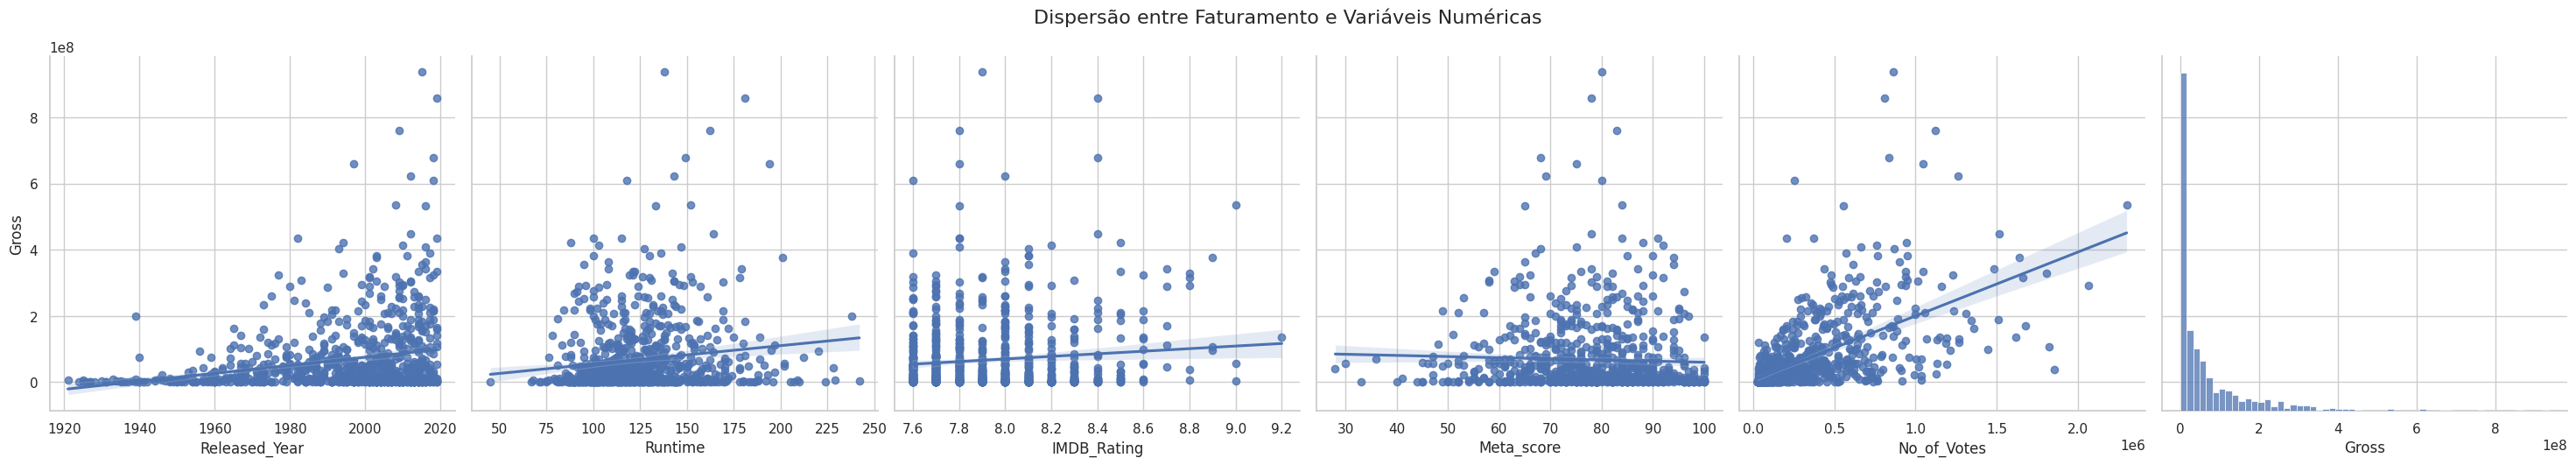

In [34]:
ax = sns.pairplot(df_clean, y_vars='Gross', x_vars=numerical_columns, kind='reg', height=5)
ax.fig.suptitle('Dispersão entre Faturamento e Variáveis Numéricas', fontsize=16, y=1.05)
ax

Algumas considerações: É possível perceber que a maioria das variáveis possuem relação fraca ou quase nula com o faturamento. Demonstrando justamente o que haviamos discutido anteriormente sobre as limitações do dataset.

* A única variável que apresentou uma relação clara foi **No_of_votes** **demonstrando uma correlação positiva**, o que pode ser explicado pelo fato da variável representar indiretamente a popularidade do filme afinal, mais votos → maior público → mais bilheteria.

* **Implicação:** métricas de popularidade/audiência são bons indicadores de receita.

* Investimento em marketing e distribuição massiva

* Focar em popularidade (grandes audiências, marketing, apelo de massa)

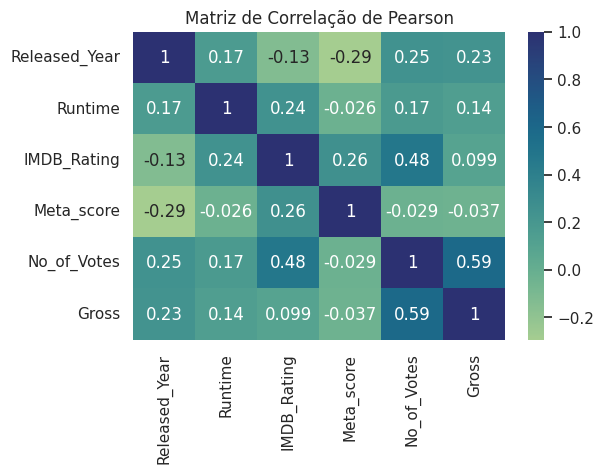

In [35]:
# correlation map
numerical_features = df_clean.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(6, 4))
sns.heatmap(numerical_features.corr(), annot=True, cmap='crest')
plt.title('Matriz de Correlação de Pearson')
plt.show()

A matriz de correlação reforça o que foi observado no gráfico de dispersão onde o **faturamento** tem a **correlação mais forte** com apenas a variável**No_of_Votes** (0.59). Essa é a única variável que mostra uma correlação moderada e as demais são baixas, **isso pode indicar entre outras coisas a ausência de uma relação linear clara ou monotônicas(correlação de Spearman, por exemplo), ou a influência de variáveis omitidas e outros fatores aleatórios.**

Devido a isso e como gostaríamos de aprofundar um pouco mais a nossa análise, optei trazer novos dados para tentar enriquecer a análise, como veremos a seguir.


### **Carregando Novos Dados Para Compor a Análise**

---

 Para aprofundar a análise e aproveitar que a coleta de novos dados foi encorajada, além de explorar possíveis fatores que influenciam o desenvolvimento dos filmes, incorporei um novo dataset aos dados fornecidos. Isso nos permitirá cruzar informações, enriquecer os insights e compreender melhor relações entre variáveis relevantes para o problema de negócio.

#### **Fonte dos Novos Dados**


 O dataset original foi obtido de um repositório público no GitHub [link do dataset bruto](https://raw.githubusercontent.com/sundeepblue/movie_rating_prediction/refs/heads/master/imdb_output.json).  
Os dados foram convertidos do formato json para CSV e salvos localmente para facilitar a análise.

As variáveis que serão agregadas ao dataset são:

* **budget:** Estimativa do custo de produção do filme (em dólares).

* Justificativa: Será fundamental para análises financeiras, especialmente em métricas como ROI (Retorno sobre Investimento).  

* Limitação: Não contempla custos de marketing/distribuição, que em produções reais podem representar até metade ou mais do orçamento total.

* **num_user_for_reviews:** Quantidade de avaliações escritas por usuários sobre o filme.

* Justificativa: Indicador indireto de engajamento do público. Meu interesse será medir a correlação para ver se é uma boa variável em conjunto com Gross e Bufget.

* Limitação: Pode ser uma variável fraca para este contexto.


* **num_facebook_like:** Número de curtidas do filme no Facebook.
* Justificativa: É uma variável que mede popularidade e presença digital; pode estar relacionado ao marketing e alcance do público.

* Limitação: Semelhante a anterior pode se apresentar fraca neste contexto além de ser dependente de uma rede social específica, que pode não representar toda a audiência global do filme.  

---

**Justificativa geral:** Bom, o intuito principal é investigativo, a ideia inicial era trazer somente a variável budget porque acredito ser uma variável estratégica quando unida a gross e para ajudar a responder o problema de negócio. Contudo, vamos explorar as outras variáveis e entender padrões uqe podem trazer insights.

---

In [36]:
# carregando novos dados

df_novo = pd.read_csv('/content/novo_df_imdb(1).csv')

In [37]:
# Visualisando primeiras linhas
df_novo.head()

,color,num_voted_users,duration,gross,genres,Series_Title,num_critic_for_reviews,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,Released_Year,num_facebook_like,imdb_score,aspect_ratio
0,Color,886204,162.0,760505847.0,Action,Avatar,723.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13\n,237000000.0,2009.0,33.0,7.9,NaN
1,Color,471220,169.0,309404152.0,Action,Pirates of the Caribbean: At World's End,302.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13\n,300000000.0,2007.0,51.0,7.1,NaN
2,Color,275868,148.0,200074175.0,Action,Spectre,602.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13\n,245000000.0,2015.0,85.0,6.8,NaN
3,Color,1144337,164.0,448130642.0,Action,The Dark Knight Rises,813.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13\n,250000000.0,2012.0,164.0,8.5,NaN
4,NaN,8,NaN,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1,NaN


In [38]:
# Remover espaços extras no início/fim e padronizar para minúsculas
df_clean['Series_Title'] = df_clean['Series_Title'].str.strip().str.lower()


In [39]:
df_novo['Series_Title'] = df_novo['Series_Title'].str.strip().str.lower()

In [40]:
df_novo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4917 entries, 0 to 4916
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4898 non-null   object 
 1   num_voted_users         4917 non-null   int64  
 2   duration                4902 non-null   float64
 3   gross                   4054 non-null   float64
 4   genres                  4917 non-null   object 
 5   Series_Title            4917 non-null   object 
 6   num_critic_for_reviews  4868 non-null   float64
 7   movie_imdb_link         4917 non-null   object 
 8   num_user_for_reviews    4896 non-null   float64
 9   language                4903 non-null   object 
 10  country                 4912 non-null   object 
 11  content_rating          4617 non-null   object 
 12  budget                  4433 non-null   float64
 13  Released_Year           4811 non-null   float64
 14  num_facebook_like       4905 non-null   

Este dataset contém informações sobre filmes, incluindo orçamento, avaliações de usuários e curtidas no Facebook. **Para esta análise, focarei apenas nas variáveis 'budget', 'num_user_for_reviews' e 'num_facebook_like',com o objetivo de explorar como esses fatores se relacionam com o desempenho dos filmes.**

In [41]:
# Criando merge
df_merged = pd.merge(df_clean, df_novo, on=['Series_Title', 'Released_Year'], how='left')


In [42]:
# contagem de linhas de cada dataset
print("df_clean:", df_clean.shape)
print("df_novo:", df_novo.shape)
print("df_merged:", df_merged.shape)


df_clean: (999, 15)
df_novo: (4917, 17)
df_merged: (999, 30)


In [43]:
#Conferir se todos os filmes de df_clean estão no merge
faltando = df_clean.merge(df_merged, on=['Series_Title', 'Released_Year'], how='left', indicator=True)
print(faltando[faltando['_merge'] == 'left_only'])


Empty DataFrame
Columns: [Series_Title, Released_Year, Certificate_x, Runtime_x, Genre_x, IMDB_Rating_x, Overview_x, Meta_score_x, Director_x, Star1_x, Star2_x, Star3_x, Star4_x, No_of_Votes_x, Gross_x, Certificate_y, Runtime_y, Genre_y, IMDB_Rating_y, Overview_y, Meta_score_y, Director_y, Star1_y, Star2_y, Star3_y, Star4_y, No_of_Votes_y, Gross_y, color, num_voted_users, duration, gross, genres, num_critic_for_reviews, movie_imdb_link, num_user_for_reviews, language, country, content_rating, budget, num_facebook_like, imdb_score, aspect_ratio, _merge]
Index: []

[0 rows x 44 columns]


In [44]:
#Conferir se a coluna budget foi adicionada corretamente

print(df_merged[['Series_Title', 'Released_Year', 'budget']].head())


                                    Series_Title  Released_Year       budget
0                                  the godfather           1972    6000000.0
1                                the dark knight           2008  185000000.0
2                         the godfather: part ii           1974   13000000.0
3                                   12 angry men           1957     350000.0
4  the lord of the rings: the return of the king           2003   94000000.0


In [45]:
# Verificar dataset pós merge
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Series_Title            999 non-null    object 
 1   Released_Year           999 non-null    Int64  
 2   Certificate             999 non-null    object 
 3   Runtime                 999 non-null    Int64  
 4   Genre                   999 non-null    object 
 5   IMDB_Rating             999 non-null    float64
 6   Overview                999 non-null    object 
 7   Meta_score              999 non-null    float64
 8   Director                999 non-null    object 
 9   Star1                   999 non-null    object 
 10  Star2                   999 non-null    object 
 11  Star3                   999 non-null    object 
 12  Star4                   999 non-null    object 
 13  No_of_Votes             999 non-null    int64  
 14  Gross                   830 non-null    fl

O dataset resultante do merge contém 999 registros com 30 variáveis, porém muitas colunas possuem valores ausentes como era de esperar.


In [46]:
# Criando dataset apenas com as variáveis necessárias
unindo_variavel = df_merged[[ 'Series_Title',
'Released_Year',
'Certificate',
'Runtime',
'Genre',
'IMDB_Rating',
'Overview',
'Meta_score',
'Director',
'Star1',
'Star2',
'Star3',
'Star4',
'No_of_Votes',
'Gross',
'budget',
'num_user_for_reviews',
'num_facebook_like' ]]

In [47]:
# Verificando daset unido as variáveid de interesse
unindo_variavel

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,budget,num_user_for_reviews,num_facebook_like
0,the godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,6000000.0,2238.0,43.0
1,the dark knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,185000000.0,4667.0,37.0
2,the godfather: part ii,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,13000000.0,650.0,14.0
3,12 angry men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,350000.0,888.0,40.0
4,the lord of the rings: the return of the king,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,94000000.0,3189.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,breakfast at tiffany's,1961,A,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,NaN,NaN,NaN
995,giant,1956,G,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,NaN,NaN,NaN
996,from here to eternity,1953,Passed,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,1650000.0,150.0,25.0
997,lifeboat,1944,Unknown,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN,NaN,NaN


In [48]:
# Verificando os dados
unindo_variavel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series_Title          999 non-null    object 
 1   Released_Year         999 non-null    Int64  
 2   Certificate           999 non-null    object 
 3   Runtime               999 non-null    Int64  
 4   Genre                 999 non-null    object 
 5   IMDB_Rating           999 non-null    float64
 6   Overview              999 non-null    object 
 7   Meta_score            999 non-null    float64
 8   Director              999 non-null    object 
 9   Star1                 999 non-null    object 
 10  Star2                 999 non-null    object 
 11  Star3                 999 non-null    object 
 12  Star4                 999 non-null    object 
 13  No_of_Votes           999 non-null    int64  
 14  Gross                 830 non-null    float64
 15  budget                4

Irei excluir os dados nulos e trabalhar com os dados restantes deste dataset a fim de analisar as novas colunas inseridas principalmente a coluna budget que ao meu ver é a mais estratégica pensando no problema de negócio e no tempo para entrega do desafio.


In [49]:
# Excluindo dados nulos para criar nova amostra de dados

df_amostra_budget= unindo_variavel.dropna()

In [50]:
# Resetando o Index
df_amostra_budget = df_amostra_budget.reset_index(drop=True)

In [51]:
# Verificando a estrutura do novo dataset já com as variáveis de interesse
df_amostra_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Series_Title          411 non-null    object 
 1   Released_Year         411 non-null    Int64  
 2   Certificate           411 non-null    object 
 3   Runtime               411 non-null    Int64  
 4   Genre                 411 non-null    object 
 5   IMDB_Rating           411 non-null    float64
 6   Overview              411 non-null    object 
 7   Meta_score            411 non-null    float64
 8   Director              411 non-null    object 
 9   Star1                 411 non-null    object 
 10  Star2                 411 non-null    object 
 11  Star3                 411 non-null    object 
 12  Star4                 411 non-null    object 
 13  No_of_Votes           411 non-null    int64  
 14  Gross                 411 non-null    float64
 15  budget                4

#### **Análise exploratória da amostra com budget**

In [52]:
# Visualizar o tamanho do dataframe
print(f"Entradas: {df_amostra_budget.shape[0]}")
print(f"Colunas: {df_amostra_budget.shape[1]}")

Entradas: 411
Colunas: 18


#### **Verificando dados duplicados nos dados da amostra**

In [53]:
if df_amostra_budget.duplicated().any():
    print("Há duplicatas no conjunto de dados.")
else:
    print("Não há duplicatas no conjunto de dados.")

Não há duplicatas no conjunto de dados.


#### **Variáveis numéricas - Verificando a Representatividade da Amostra**

Há algumas maneiras de verificar se a nossa amostra está representativa. Uma delas é a comparação gráfica das estatísticas descritivas da amostra e do dataset. Optei por não realizar teste de hipótes para testar a representatividade pois como conhecemos os dados de onde foi tirada a amostra podemos "tirar a prova" comparando as distribuições.

Reforçando que estamos seguindo este método poís o dataset original já é bastante representativo por si só contendo somente os 1000 filmes com os maiores faturamento, apresentando pouca variabilidade.

In [54]:
print(df_amostra_budget[['IMDB_Rating', 'No_of_Votes', 'Gross']].describe())
print(df_clean[['IMDB_Rating', 'No_of_Votes', 'Gross']].describe())

       IMDB_Rating   No_of_Votes         Gross
count   411.000000  4.110000e+02  4.110000e+02
mean      7.956204  4.696261e+05  9.792056e+07
std       0.313406  3.822857e+05  1.106362e+08
min       7.600000  3.122200e+04  6.013000e+03
25%       7.700000  1.871505e+05  2.247523e+07
50%       7.900000  3.712910e+05  5.600037e+07
75%       8.100000  6.410890e+05  1.336754e+08
max       9.200000  2.303232e+06  7.605076e+08
       IMDB_Rating   No_of_Votes         Gross
count   999.000000  9.990000e+02  8.300000e+02
mean      7.947948  2.716214e+05  6.808257e+07
std       0.272290  3.209126e+05  1.098076e+08
min       7.600000  2.508800e+04  1.305000e+03
25%       7.700000  5.547150e+04  3.245338e+06
50%       7.900000  1.383560e+05  2.345744e+07
75%       8.100000  3.731675e+05  8.087634e+07
max       9.200000  2.303232e+06  9.366622e+08


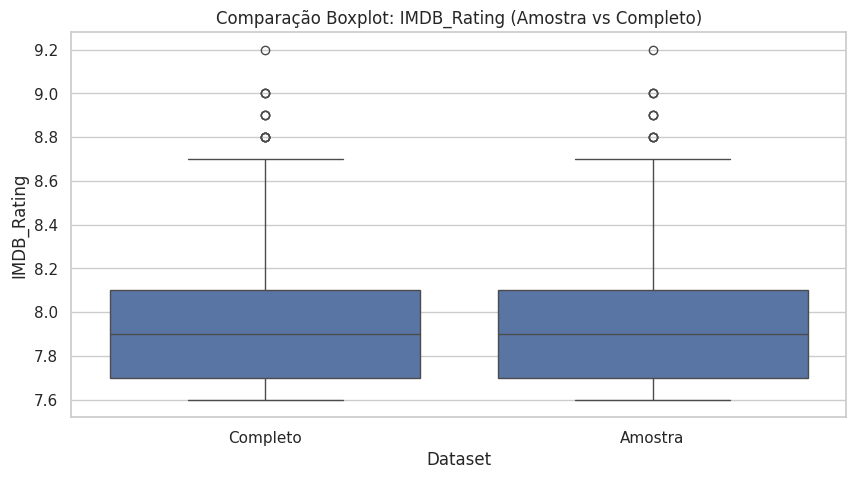

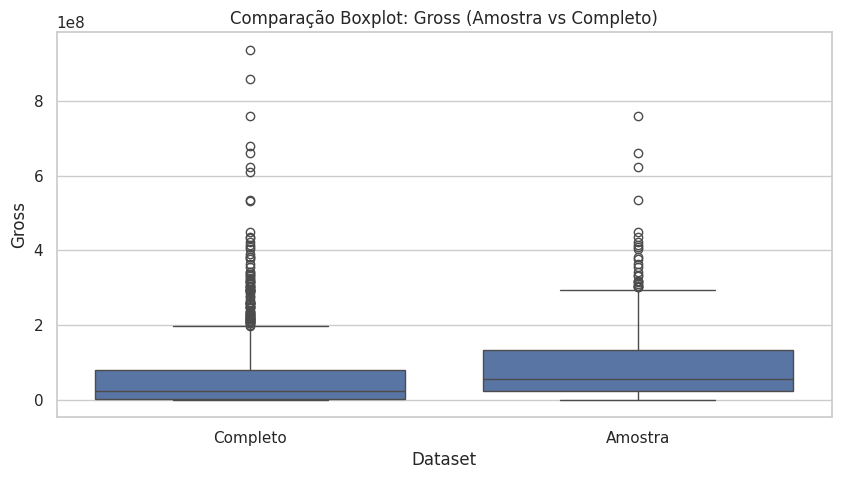

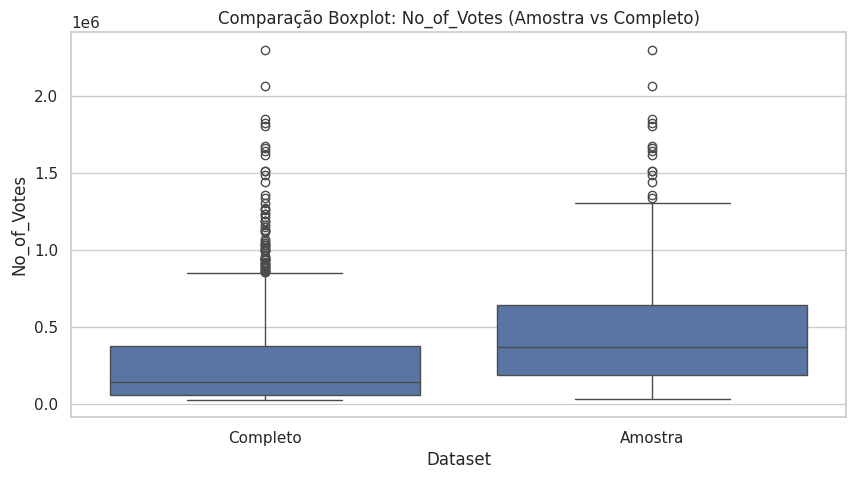

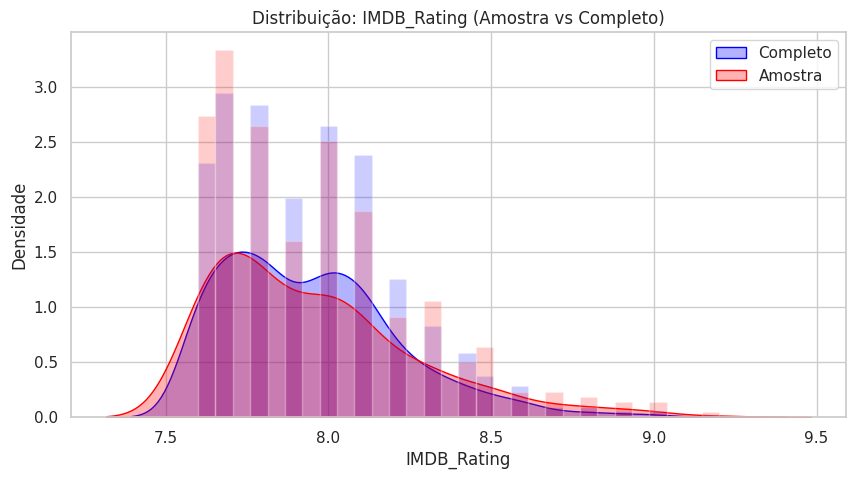

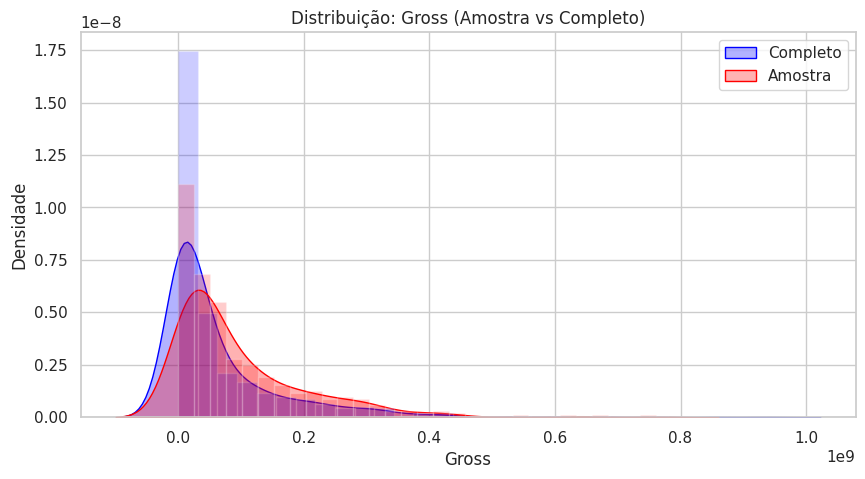

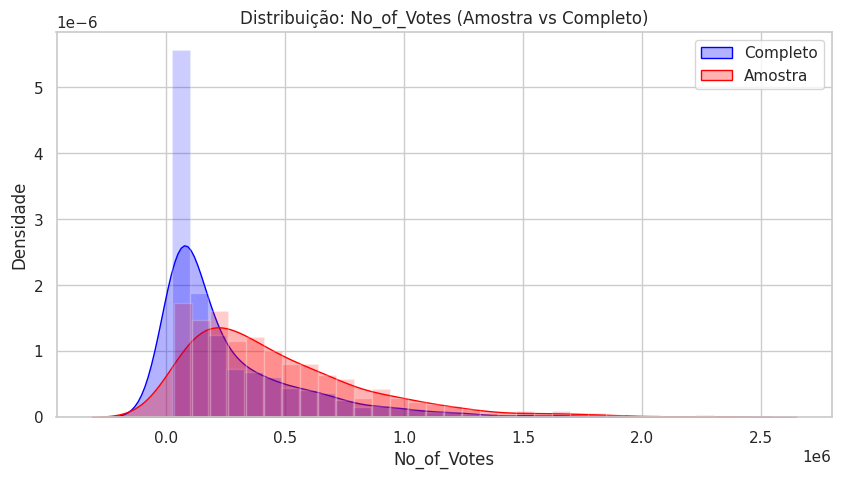

In [55]:
# Variáveis que você quer comparar
cols_to_compare = ['IMDB_Rating', 'Gross', 'No_of_Votes']

# # 1. Boxplots lado a lado
for col in cols_to_compare:
    plt.figure(figsize=(10,5))
    combined = pd.concat([
        df_clean[[col]].assign(Dataset='Completo'),
        df_amostra_budget[[col]].assign(Dataset='Amostra')
    ], ignore_index=True)  # <--- aqui
    sns.boxplot(x='Dataset', y=col, data=combined)
    plt.title(f'Comparação Boxplot: {col} (Amostra vs Completo)')
    plt.show()

# 2. KDE plots / Histogramas sobrepostos
for col in cols_to_compare:
    plt.figure(figsize=(10,5))

    # KDE
    sns.kdeplot(df_clean[col].dropna(), label='Completo', color='blue', fill=True, alpha=0.3)
    sns.kdeplot(df_amostra_budget[col].dropna(), label='Amostra', color='red', fill=True, alpha=0.3)

    # Histograma sobreposto (opcional)
    plt.hist(df_clean[col].dropna(), bins=30, color='blue', alpha=0.2, density=True)
    plt.hist(df_amostra_budget[col].dropna(), bins=30, color='red', alpha=0.2, density=True)

    plt.title(f'Distribuição: {col} (Amostra vs Completo)')
    plt.xlabel(col)
    plt.ylabel('Densidade')
    plt.legend()



    plt.show()

É possível observar que após comparar as distribuições das principais variáveis entre o dataset completo (999 filmes) e a amostra com informações de orçamento (411 filmes), **observamos que as medidas de tendência central (média e mediana) e a forma das distribuições são bastante semelhantes o que é possível observar também através dos gráficos**. Isso indica que a amostra pode ser considerada representativa do conjunto original, mesmo apresentando tamanho reduzido. Portanto, é estatisticamente viável conduzir análises exploratórias focadas em budget utilizando a amostra, sem risco significativo de enviesar as conclusões para o problema de negócio.

### **Análises Direcionadas**

#### **Análise de Correlação entre Variáveis Numéricas**

Vamos realizar uma análise de correlação agora com as novas variáveis.

In [56]:
# Colunas da amostra
df_amostra_budget.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'budget',
       'num_user_for_reviews', 'num_facebook_like'],
      dtype='object')

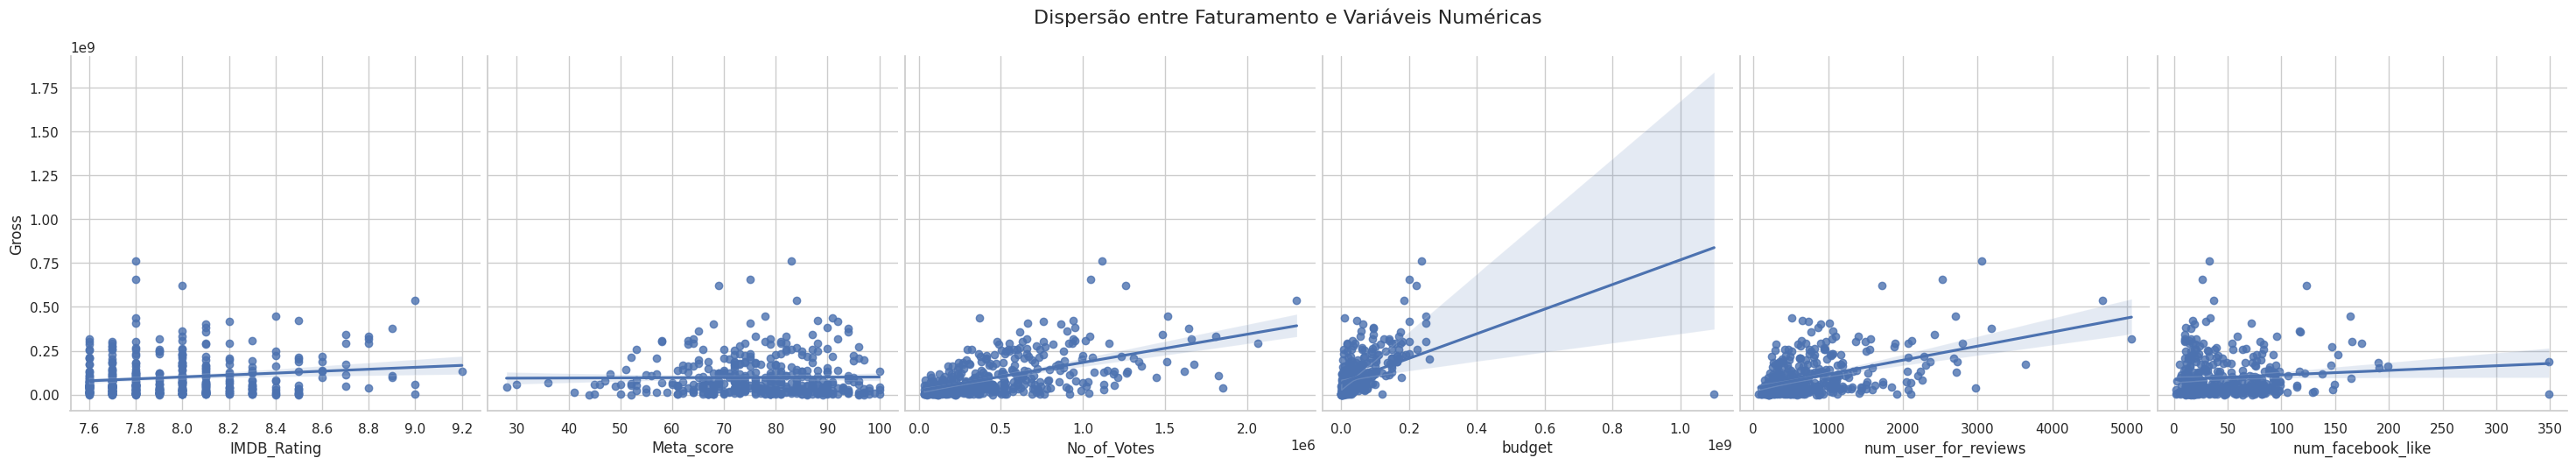

In [57]:
# Relação entre variáveis
ax = sns.pairplot(df_amostra_budget, y_vars='Gross', x_vars=df_amostra_budget[['IMDB_Rating', 'Meta_score','No_of_Votes', 'budget', 'num_user_for_reviews', 'num_facebook_like']], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre Faturamento e Variáveis Numéricas', fontsize=16, y=1.05)
ax

Não indentificamos padrões não lineares como haviamos levantado anteriormente.

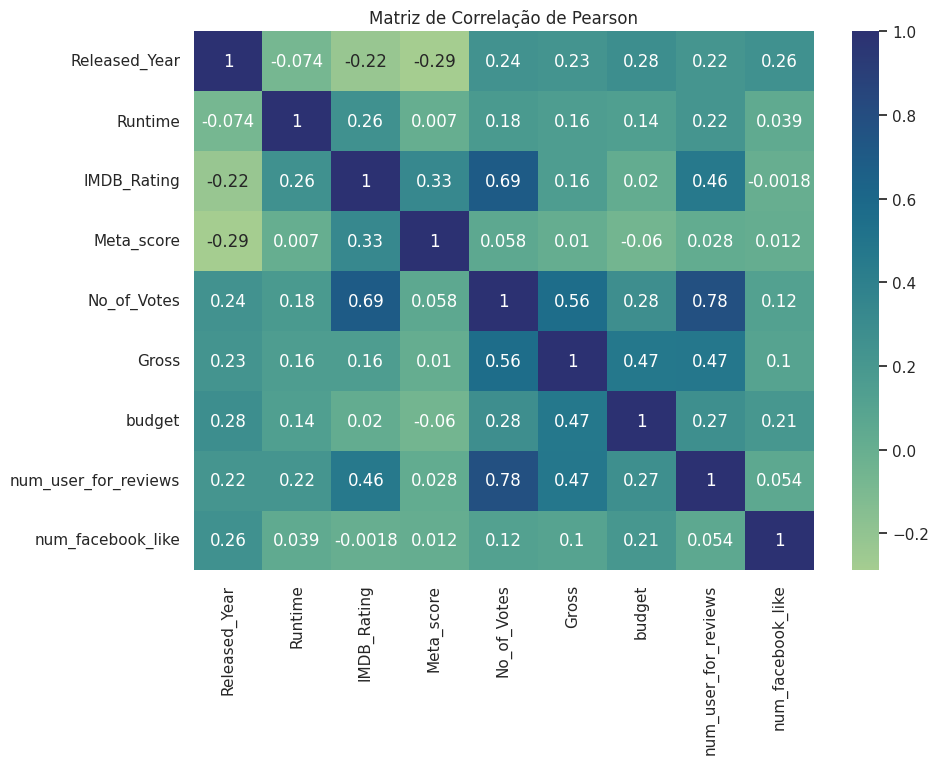

In [58]:
# correlation map
numerical_features_sample = df_amostra_budget.select_dtypes(include=["float64", "int64"])
plt.figure(figsize=(10, 7))
sns.heatmap(numerical_features_sample.corr(), annot=True, cmap='crest')
plt.title('Matriz de Correlação de Pearson')
plt.show()

Podemos perceber que tomando a variável alvo (faturamento) como foco:

* **budget** (0.47) - Correlação moderada positiva.

Maior orçamento tende a gerar maior faturamento, mas não é determinante.

-> investir mais aumenta as chances de retorno, mas não garante sucesso (outros fatores também contam).

* **num_user_for_reviews** (0.47) - Correlação moderada positiva, muito próxima da de budget.

-> Filmes que recebem mais reviews têm maior faturamento, mas também não é determinante está mais para um efeito do que uma causa.


- **num_facebook_like** (0.10) - Correlação fraca positiva.

-> Pouca relação linear com faturamento.


De um modo geral uma recomendação prática seria:

* Priorizar produções com orçamento bem planejado (não necessariamente o maior possível), focando em histórias/atores/gêneros que despertem alto engajamento do público (votos e reviews).

* Investir em marketing digital e distribuição para transformar orçamento em visibilidade

#### **Relação entre as demais variáveis (Explicativas)**

Acho interessante observar as relações entre as demais variáveis e comenta-las pois ajudam a compor a análise e deixar claro os padrões dos dados:

* **IMDB_Rating x No_of_Votes (0.69)**

Filmes com maiores notas tendem a receber mais votos, o que indica engajamento da audiência.


* **IMDB_Rating x num_user_for_reviews (0.46)**

Filmes com boas avaliações também geram mais resenhas de usuários.

Isso sugere que o "boca a boca" digital (reviews) pode ser reforçado por qualidade percebida.

* **No_of_Votes x num_user_for_reviews (0.78)** (multicolinearidade se futuramente aplicarmos em um modelo)

Relação muito forte: filmes com mais votos também recebem mais resenhas.

Isso mostra que o nível de engajamento do público está altamente correlacionado entre diferentes métricas, e talvez você não precise usar todas essas variáveis juntas em um modelo (para evitar redundância).

* **budget x Released_Year (0.28)** (relação fraca)

Orçamentos cresceram ao longo do tempo, o que faz sentido pelo aumento dos custos de produção, inflação etc.

* **budget x num_facebook_like (0.20)**

Investimento em divulgação e marketing faz parte do orçamento. Seria interessante que tivessemos essas informações para cruzar, mesmo assim essa correlação mesmo que fraca, dá indicios da importância e peso que o marketing e divulgação tem na produção de um novo filme.

* **num_facebook_like x outras variáveis**

Curiosamente, correlação baixa com Gross (0.10), mas acredito que esteja mais ligado ao baixo engajamento do publico em interações deste tipo no Facebook. Seria interessante ter dados de outras redes sociais para entender o comportamento do público.



#### **Scatter plot com linha de regressão de Gross vs Budget**

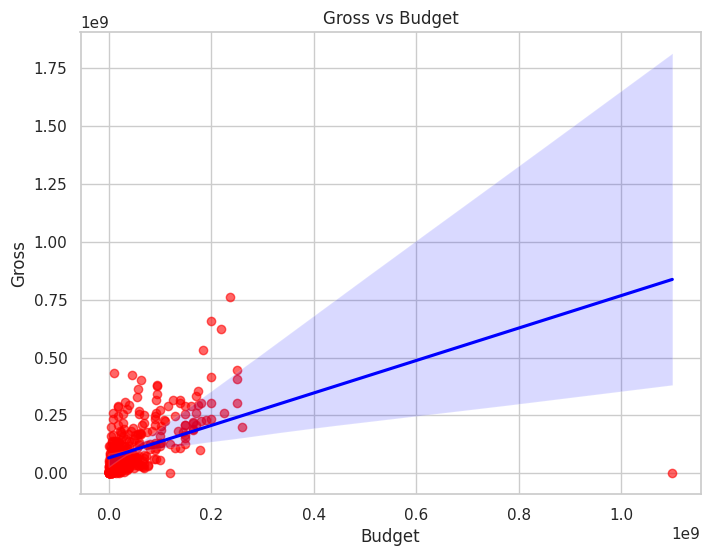

In [59]:
from scipy.stats import pearsonr

# Scatter plot com regressão
plt.figure(figsize=(8,6))
sns.regplot(
    x='budget',
    y='Gross',
    data=df_amostra_budget,
    scatter_kws={'alpha':0.6, 'color':'red'},  # pontos semitransparentes
    line_kws={'color':'blue'}                  # linha de regressão
)
plt.title('Gross vs Budget')
plt.xlabel('Budget')
plt.ylabel('Gross')



plt.show()

* Tendência positiva, a linha azul indica que, em média, quanto maior o orçamento do filme, maior tende a ser o faturamento.


* Isso sugere que investir mais pode estar associado a maiores retornos brutos. Mas seria necessário mais variáveis para entendermos o peso de cada coisa dentro deste orçamento. Marketing deve ser algo bem investido, pensando em atingir sucesso mas isso é apenas uma hipótese.

* Dispersão grande (alta variabilidade), apesar da tendência positiva, os pontos vermelhos estão bastante espalhados.

In [60]:
# Outra maneira de verificar a correlação contendo também o p-value
# Retira valores nulos (quando houver, esse passo é extremamente importante por isso coloquei no código mesmo sabendo que há não nulos na amostra, apenas como demonstração)

df_corr = df_amostra_budget[['budget', 'Gross']].dropna()

# Calcula correlação de Pearson
corr, p_value = pearsonr(df_corr['budget'], df_corr['Gross'])

print(f'Correlação de Pearson: {corr:.2f}')
print(f'P-valor: {p_value:}')

Correlação de Pearson: 0.47
P-valor: 4.211679952577957e-24


* **Correlação 0.47:** indica uma relação moderada positiva entre budget e Gross. Ou seja, filmes com maior orçamento tendem a faturar mais, mas não é uma relação perfeita poís outros fatores também influenciam. Vale investigar outras variáveis externas para compor a análise.

* **P-valor < 0.05:** extremamente significativo. Podemos confiar que essa relação não é fruto do acaso.

#### **Filmes com os Maiores Orçamentos**



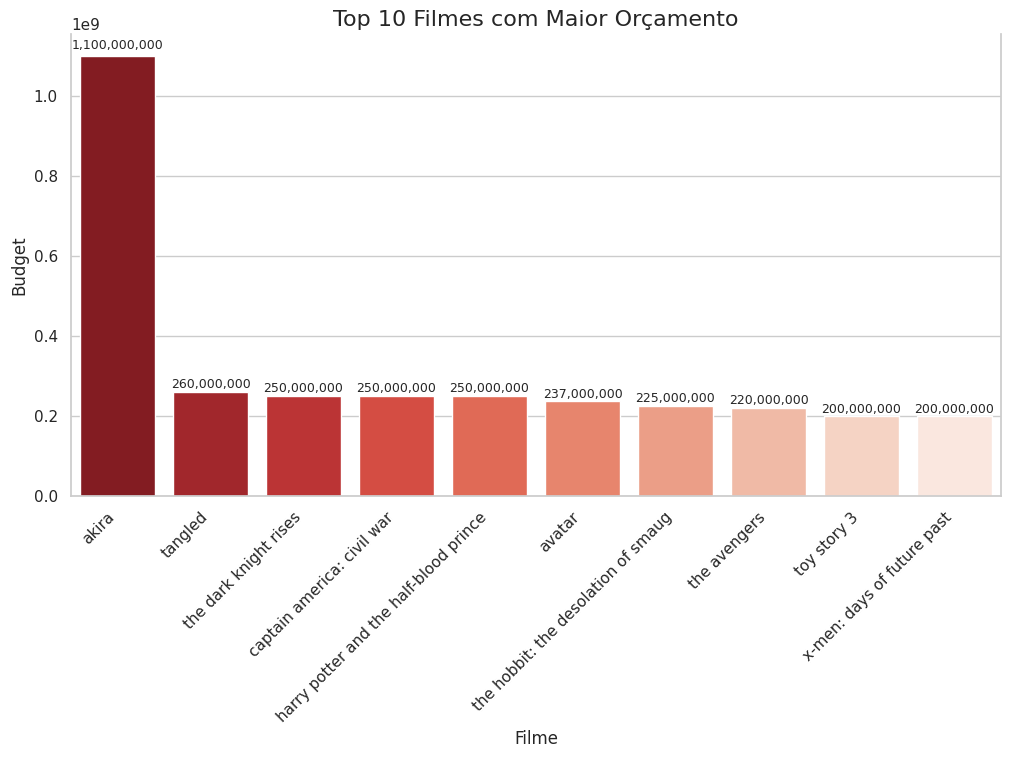

In [61]:
# Seleciona os top 10 filmes por orçamento
top_budget = df_amostra_budget.nlargest(10, 'budget')

# Barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(
    x='Series_Title',
    y='budget',
    data=top_budget,
    palette='Reds_r'
)
plt.title('Top 10 Filmes com Maior Orçamento', fontsize=16)
plt.xlabel('Filme')
plt.ylabel('Budget')
plt.xticks(rotation=45, ha='right')

# Adiciona os valores no topo das barras
for i, row in enumerate(top_budget['budget']):
    ax.text(i, row + row*0.01, f'{row:,.0f}', ha='center', va='bottom', fontsize=9)

# Remove linha superior
sns.despine(top=True, right=False, left=False, bottom=False)

plt.show()

#### **Criando Métrica de negócio (ROI) com as Variáveis Budget e Gross**

Agora que temos a variável budget podemos criar o **ROI (Return on Investment) ou Retorno sobre o Investimento** para tentar entender a rentabilidade de uma produção. Filmes com alto faturamento muitas vezes também exigem orçamentos gigantescos, o que reduz o ganho relativo.


No contexto dos filmes, podemos calcular o ROI esperado da seguinte forma:  

$$
ROI = \frac{Gross - Budget}{Budget}
$$  


Esse indicador mostra **quanto o filme retornou em relação ao valor investido**.  

- ROI = **1.0 (100%)** -> o filme dobrou o valor investido.  
- ROI = **0.2 (20%)** -> trouxe apenas 20% de retorno além do orçamento.  
- ROI **negativo** -> prejuízo.  

 **Por que isso é importante?**  

Enquanto o *Gross* responde à pergunta *“Qual filme arrecadou mais?”*, o **ROI responde**:  

-> *“Qual filme gerou mais retorno proporcional ao que custou?”*  

**Na prática, isso ajuda a priorizar filmes que não necessariamente precisam ser os maiores blockbusters em termos de bilheteria absoluta (como foi possível observar nas análises), mas que trazem mais eficiência financeira**.


---

In [62]:
# 1. Criar a coluna ROI
df_amostra_budget['ROI'] = (df_amostra_budget['Gross'] - df_amostra_budget['budget']) / df_amostra_budget['budget']

# 2. Top 10 filmes por ROI
top_roi = df_amostra_budget[['Series_Title', 'Gross', 'budget', 'ROI']] \
    .sort_values(by='ROI', ascending=False) \
    .head(10)

print("Top 10 filmes por ROI:")
print(top_roi)




Top 10 filmes por ROI:
                   Series_Title        Gross      budget         ROI
345                   halloween   47000000.0    300000.0  155.666667
123                       rocky  117235247.0    960000.0  121.120049
234                        once    9439923.0    180000.0   51.444017
128          gone with the wind  198676459.0   3977000.0   48.956364
377                         saw   56000369.0   1200000.0   45.666974
346             blazing saddles  119500000.0   2600000.0   44.961538
271  e.t. the extra-terrestrial  435110554.0  10500000.0   40.439100
32                       psycho   32000000.0    806947.0   38.655640
350                    fantasia   76408097.0   2280000.0   32.512323
173                        jaws  260000000.0   8000000.0   31.500000


Interpretação:

ROI bruto (em vezes)
ROI = 155.6 -> o filme rendeu 155,6 vezes o investimento inicial.

#### Analisando Alguns Resultados da Tabela:

É possível observar que não são necessariamente os filmes de maior bilheteria absoluta que dominam o ranking, mas sim aqueles com baixo custo de produção e bom desempenho de bilheteria.

1. **Halloween (ROI = 155x)**

* Produzido com apenas 300 mil dólares, arrecadou 47 milhões.
* Exemplo clássico de terror de baixo orçamento com retorno estrondoso.
* Indica que gêneros como terror podem ser boas apostas, pois não exigem grandes investimentos.

2. **Rocky (ROI = 121x)**

* Custo modesto de 960 mil e arrecadação de 117 milhões.
* Histórias inspiradoras e personagens fortes podem atrair público sem precisar de blockbusters.

3. **Once (ROI = 51x)**

* Um musical simples, baixo orçamento (180 mil) e bom desempenho.
* Reflete o poder de nichos de público bem definidos.

4. **Gone with the Wind (ROI ≈ 49x)**

* Aqui já temos um filme caro para época (3,9M), mas ainda assim extremamente rentável.


5. **Saw (ROI = 45x)**
* Outro caso clássico de terror com baixíssimo orçamento (1,2M) e grande retorno.
* O mesmo padrão visto com Halloween.


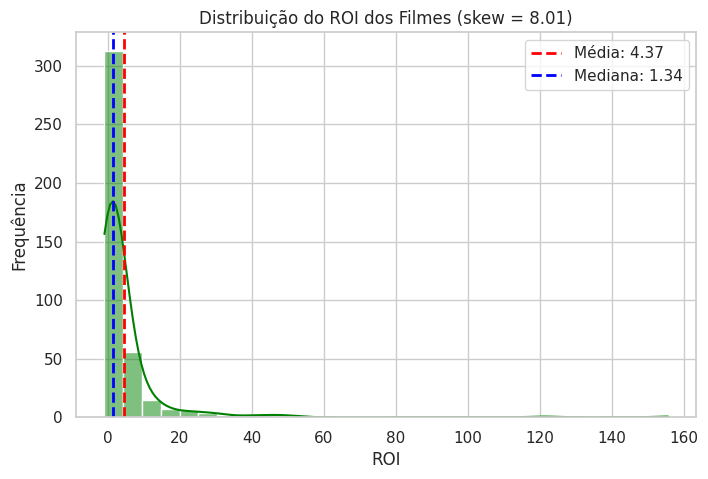

In [63]:
# Histograma de distribuição do ROI

from scipy.stats import skew

# 3. Histograma do ROI com média, mediana e skewness
plt.figure(figsize=(8,5))
sns.histplot(df_amostra_budget['ROI'], bins=30, kde=True, color='green')

# Cálculo da média, mediana e skewness
media = df_amostra_budget['ROI'].mean()
mediana = df_amostra_budget['ROI'].median()
assimetria = skew(df_amostra_budget['ROI'].dropna())

# Adicionando linhas verticais
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Média: {media:.2f}')
plt.axvline(mediana, color='blue', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Título com skewness
plt.title(f'Distribuição do ROI dos Filmes (skew = {assimetria:.2f})')
plt.xlabel('ROI')
plt.ylabel('Frequência')
plt.legend()
plt.show()


In [64]:
# Estatistica descrtiva da coluna ROI
df_amostra_budget['ROI'].describe()

,ROI
count,411.000000
mean,4.373510
std,11.957111
min,-0.999497
25%,0.200760
50%,1.336635
75%,3.778996
max,155.666667


* **Assimetria à direita** (distribuição enviesada/calda longa) -> A maior parte dos filmes concentra ROI entre -0.99 a 3.77 vezes o valor do orçamento, com queda rápida na frequência à medida que o ROI aumenta.

* **Presença de outliers/extremos** -> Existem poucos filmes com ROI muito alto (acima de 40, chegando até 150). Esses casos são exceções, são filmes de baixo orçamento que explodiram em bilheteria.

* **Importância da mediana** -> A distribuição é fortemente assimétrica, então a mediana(1.34) é mais representativa do ROI típico do que a média(4.37).

**Será que é possível descobrir o intervalo da média/mediana do nosso dataset maior?**

Vamos tentar fazer isso usando intervalo de confiança(IC). O intervalo de confiança é usado para quantificar a incerteza em estimativas feitas a partir de amostras, fornecendo um intervalo de valores que provavelmente contém um parâmetro.

-> **A única ressalva aqui é que por ser uma subamostra pode ser que haja maior variabilidade no intervalo do que se estivessemos calculando o IC para a amostra maior.** **Essa é apenas um projeção hipotética.**

In [65]:
# Estatísticas da amostra
roi = df_amostra_budget['ROI'].dropna()
n = len(roi)
mean_roi = roi.mean()
median_roi = roi.median()  # cálculo da mediana
std_roi = roi.std()

# Intervalo de confiança 95% (usando z ~ 1.96 para normal)
conf_lower = mean_roi - 1.96 * (std_roi / np.sqrt(n))
conf_upper = mean_roi + 1.96 * (std_roi / np.sqrt(n))

print(f"Média do ROI: {mean_roi:.2f}")
print(f"Mediana do ROI: {median_roi:.2f}")
print(f"Intervalo de confiança 95% da média: ({conf_lower:.2f}, {conf_upper:.2f})")


Média do ROI: 4.37
Mediana do ROI: 1.34
Intervalo de confiança 95% da média: (3.22, 5.53)


**Interpretação do resultado:**

* A média do ROI na subamostra de 411 filmes foi de 4.37, com **intervalo de confiança de 95% estimado entre 3.22 e 5.53.**

* A mediana foi de 1.34, indicando que metade dos filmes teve ROI abaixo desse valor. A diferença entre média e mediana mostra a presença de alguns outliers com ROI muito alto, que puxam a média para cima.

* **O intervalo de confiança fornece uma estimativa plausível da média caso o dataset maior de 999 filmes tivesse a variável ROI, permitindo uma visão preliminar do comportamento financeiro típico dos filmes de sucesso.**

#### **Conclusão Sobre A Importância do ROI E Limitações**

A métrica de ROI se mostra extremamente valiosa para avaliar a eficiência financeira dos filmes, pois relaciona diretamente retorno e investimento. No entanto, vale ressaltar algumas limitações: **o ROI não considera o valor de longo prazo das franquias, os custos indiretos de marketing, nem o impacto cultural ou crítico de determinadas produções.**

Dessa forma, **o ROI é sim uma métrica importante para compor a análise financeira mas deve ser interpretado com cautela**, e ser complementado por outras perspectivas estratégicas quando o objetivo é decidir o próximo filme a ser produzido.

---

# <font color='red' style='font-size: 30px;'>Relatório Final - Entrega 1</font>
<hr style='border: 2px solid red;'>

### **Introdução**
O objetivo deste trabalho foi analisar os dados de filmes a fim de identificar quais características mais influenciam no sucesso financeiro, auxiliando na decisão sobre quais produções podem ser mais rentáveis. Para isso, foram utilizados dois datasets, integrados após tratamento e limpeza.

### **Limpeza e Tratamento de Dados**

* Análise inicial das colunas, com identificação de tipos de dados inconsistentes.

* Tratamento de valores ausentes:

* Importação e integração dos datasets.

* Criação de variáveis derivadas, como o ROI (Return on Investment), essencial para medir eficiência financeira.

    

### **Análise Exploratória de Dados (EDA)**

Foram explorados os dados de forma descritiva e visual, com destaque para:


* Distribuição do ROI:
A maior parte dos filmes apresenta ROI próximo a zero, com poucos casos extremos muito lucrativos. Isso indica que a maioria das produções não gera retornos exponenciais.

* Top 10 maiores faturamentos:
Filmes de grandes franquias se destacam, mostrando que orçamento elevado tende a estar ligado a grandes retornos absolutos, mas não necessariamente a maior eficiência (ROI).

* Top 10 atores

* Gross vs Budget:
Observou-se correlação positiva entre orçamento e faturamento, embora dispersa. Nem sempre investir mais garante proporcionalmente mais retorno.

* Correlação geral das variáveis

### **O Que mais Foi Feito**

* Tratamento de nulos: mantivemos a amostra completa (999) para EDA geral e criamos uma subamostra (≈411–425) com budget preenchido para estudar ROI (análise complementar).



### **Limitações e Sugestões futuras**


* O ROI não considera fatores como custos de marketing, valor de longo prazo de franquias ou impacto cultural dos filmes.

* Métricas adicionais poderiam enriquecer a análise, como: (com mais dados)

* Despesas de marketing e distribuição.

* Explorar mais dados em outras fontes confiáveis

### **Conclusões e Insights**

* Budget (Orçamento) – deve ser controlado, orçamentos médios e baixos tendem a apresentar retornos mais eficientes (Gross).

* ROI (Return on Investment) – métrica importante para medir a eficiência financeira do filme.

* **Risco-conservador / objetivo: receita estável:**

* Produzir médias produções em gêneros com histórico estável (ex.: animação familiar, ação/aventura.

* Foco em classe de certificação LIVRE(maximiza público).

* Garantir forte distribuição (screens) e janelas de exibição estratégicas (verão/feriado).


* **Risco-empreendedor / objetivo: ROI alto:**

* Financiar projetos de baixo orçamento (terror, drama indie, experimentais) com campanhas digitais eficientes.

* Estruturar portfólio: muitos projetos pequenos, um ou dois podem explodir em ROI.

   



---





#### **Respondendo as Perguntas do Desafio**

a - **Qual filme você recomendaria para uma pessoa que você não conhece?**

In [66]:
# Filtrando o filme mais recomendado com base em IMDB_Rating, Meta_score e No_of_Votes
top_filme = df_clean.sort_values(
    by=['IMDB_Rating', 'Meta_score', 'No_of_Votes'],
    ascending=False
).head(1)  # pega apenas o top 1

# Mostrar o resultado
print(top_filme[['Series_Title', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']])

    Series_Title  IMDB_Rating  Meta_score  No_of_Votes
0  the godfather          9.2       100.0      1620367


* Com base nos critérios de avaliação do IMDb, Meta Score e número de votos, o **filme mais recomendado para uma pessoa desconhecida é “The Godfather”, com nota IMDb 9.2, Meta Score 100 e mais de 1,6 milhão de votos, indicando alta aceitação crítica e popular.**

* Sendo assim ainda poderiamos usar essa mesma lógica para recomendar outros filmes apenas inserindo mais variáveis por exemplo, o gênero, para refinar ainda mais a busca conforme o gosto pessoal.

**c - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

Aqui acredito que aqui estamos falando de técnicas como de NLP (Processamento de Linguagem Natural), para insights qualitativos ou até tentar inferir o gênero ou tema do filme com técnicas mais profundas.

Os insights que podemos tirar com essa técnica são por exemplo:

* **Palavras mais frequentes:** mostram temas comuns, elementos de enredo ou palavras-chave recorrentes.

* **Padrões de linguagem por gênero:** filmes de ação podem mencionar “fight”, “hero”, “battle”; comédia pode ter “funny”, “love”, “friend” por exemplo.

* **Resumo rápido da coleção:** você consegue ver visualmente quais temas dominam a base de filmes.  

* Algumas bibliotecas que podem ser utilizadas são a WordCloud e técnicas como embeddings e modelos de machine learning como Random Forest, Naive Bayes, ou modelos de NLP como BERT para tentar prever o filme.

**Embora eu ainda não tenha aplicado essas técnicas na prática, tenho interesse em aprender e implementá-las para ajudar a gerar insights mais profundos a partir de dados textuais.**

## **Machine Learning - Criando um Modelo de Regressão**

* Aqui o cenário muda pois nossa variável target é a **nota do IMDB**.

* Como já realizamos o EDA e a limpeza aqui o foco será o pré-processamento e treinamento dos modelos.

* **Este é um problema de regressão** poís a variável que vamos prever é contínua (Qual será a nota do filme). Nos problemas de classificação tentamos prever uma categoria ou rótulo, como por exemplo Modelos de Fraude e Churn cujo o rótulo da target é 0 ou 1(binary) ou mesmo Sim ou Não.

#### **Importação dos pacotes necessários**

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import joblib

In [68]:
# Verificando o dataset que será utilizado

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    Int64  
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    Int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    float64
dtypes: Int64(2), float64(3), int64(1), object(9)
memory usage: 119.2+ KB


**Aqui não irei tratar a variável Gross com a mediana antes da separação para não correr o risco de haver data leakage. Por isso, optei por utilizar SimpleImputer após a separação em treino e teste.**

#### **Definindo os Variáveis do modelo**




In [69]:
# Instanciando as variáveis do modelo
numeric_features = ['Gross', 'Runtime', 'Meta_score', 'No_of_Votes']
categorical_features = ['Certificate', 'Genre']

#### **ANÁLISE DE MULTICOLINEARIDADE PARA MODELOS LINEARES**

**Multicolinearidade** ocorre quando duas ou mais variáveis independentes em um modelo de regressão estão altamente correlacionadas

* Isso dificulta a separação do efeito individual de cada uma sobre a variável dependente.

* Isso pode gerar coeficientes instáveis e interpretáveis de forma equivocada. O cálculo do **VIF (Variance Inflation Factor)** é importante porque quantifica o quanto a variância de um coeficiente é inflacionada pela presença de multicolinearidade, ajudando a identificar quais variáveis podem estar comprometendo a robustez do modelo




- O VIF mede **multicolinearidade** entre variáveis preditoras.

- Valores altos (geralmente **VIF > 5** ou **10**) indicam que uma variável é altamente correlacionada com outras, podendo causar **instabilidade** e dificultar a interpretação dos coeficientes, principalmente em **modelos lineares** (como Regressão Linear ou Logística).



#### **Resumo Geral da Análise VIF**

| Faixa de VIF     | Interpretação           |
|-----------------|------------------------|
| VIF ≈ 1          | Sem multicolinearidade |
| 1 < VIF < 5      | Baixa (aceitável)      |
| 5 ≤ VIF < 10     | Moderada (acompanhar)  |
| VIF ≥ 10         | Alta (atenção!)        |


In [70]:
# Cópia só para VIF
X_vif = df_clean[numeric_features + categorical_features].copy()

# Tratar nulos de Gross apenas para VIF
X_vif['Gross'] = X_vif['Gross'].fillna(X_vif['Gross'].median())

# Transformar em dummies
X_vif = pd.get_dummies(X_vif, drop_first=True)

# Converter tudo para float (garante compatibilidade)
X_vif = X_vif.astype(float)

# Adicionar constante
X_vif = sm.add_constant(X_vif)

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


                              feature          VIF
0                               const  1648.828070
1                               Gross     2.487487
2                             Runtime     1.771521
3                          Meta_score     1.335128
4                         No_of_Votes     2.234610
..                                ...          ...
217  Genre_Mystery, Romance, Thriller     1.220631
218   Genre_Mystery, Sci-Fi, Thriller     1.420794
219           Genre_Mystery, Thriller     2.854264
220                    Genre_Thriller     1.222780
221                     Genre_Western     1.842124

[222 rows x 2 columns]


* Nenhuma variável contínua ou de gênero apresenta multicolinearidade preocupante (constante pode ser ignorada).

### **Pré-Processamento, Separação Variáveis Explicativas(x) e Variável Resposta (y), treino/teste e Treinamento dos Modelos**

In [71]:
# Variáveis numéricas e categóricas
numeric_features = ['Gross', 'Runtime', 'Meta_score', 'No_of_Votes', 'Released_Year']
categorical_features = ['Certificate', 'Genre']

In [72]:
# Separando X e y
X = df_clean[numeric_features + categorical_features]
y = df_clean['IMDB_Rating']

# Separando treino e teste (Método Hold Out)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline para variáveis numéricas
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),          # Preenche nulos com mediana
    ('log', FunctionTransformer(np.log1p, validate=False)), # Log1p para reduzir impacto de outliers
    ('scaler', StandardScaler())                            # StandardScaler
])

# Pipeline variáveis categóricas
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combinando transformações
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Pipeline Linear Regression (Baseline)
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Pipeline Random Forest Regressor
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=7))
])

# Pipeline Gradient Boosting
gbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                            max_depth=3, random_state=7))
])



# Treinando Linear Regression
lr_pipeline.fit(X_train, y_train)

# Fazendo predição com Linear regressor
y_pred_lr = lr_pipeline.predict(X_test)

# Treinando Random Forest
rf_pipeline.fit(X_train, y_train)

# Fazendo predição com Random Forest
y_pred_rf = rf_pipeline.predict(X_test)

# Treinando Gradient Boosting
gbr_pipeline.fit(X_train, y_train)

# Fazendo predição com Gradient Boosting
y_pred_gbr = gbr_pipeline.predict(X_test)

#### **Comparando Modelos**




In [73]:
def print_metrics(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Metrics:")
    print(f"R²: {r2:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"MAE: {mae:.3f}\n")

In [74]:
# Avaliando modelos
print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")
print_metrics(y_test, y_pred_gbr, "Gradient Boosting")

Linear Regression Metrics:
R²: 0.048
RMSE: 0.250
MAE: 0.197

Random Forest Metrics:
R²: 0.414
RMSE: 0.196
MAE: 0.152

Gradient Boosting Metrics:
R²: 0.373
RMSE: 0.203
MAE: 0.160



#### **Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?**


Os modelos no geral poderiam ser melhores, será necessário fazer o **ajuste de hiperparametros** e realizar novo treino. Resumindo as métricas percebe-se que:

| Modelo            | R²     | RMSE  | MAE   |
| ----------------- | ------ | ----- | ----- |
| Linear Regression | -0.005 | 0.257 | 0.204 |
| Random Forest     | 0.362  | 0.205 | 0.160 |
| Gradient Boosting | 0.375  | 0.203 | 0.162 |


* Linear Regression praticamente não consegue explicar a variância das notas do IMDB (R² ≈ 0) e apresenta os maiores erros (RMSE e MAE).

* Random Forest e Gradient Boosting capturam melhor os padrões dos dados mas ainda longe de estar bom. O Gradient Boosting tem ligeira vantagem no R² e RMSE, mas ambos têm desempenho bastante similar.


---
Por hora a medida de performance escolhida foi o MAE (Mean Absolute Error), pois indica de forma direta o erro médio em pontos de nota do IMDB, facilitando a comunicação com gestores.

Por exemplo, um MAE de 0,16 significa que, em média que a previsão do modelo fica cerca de ±0,16 pontos da nota real, auxiliaria por exemplo a pensar no orçamento de produção ou estratégias de marketing com mais confiança.

O RMSE foi usado como complemento para avaliar o impacto de grandes erros e também é uma métrica importante a depender do contexto, enquanto o R² é mais técnico e menos intuitivo para decisões práticas(ele ajuda a entender o quanto uma variável explica o target, por exemplo).


#### **Respondendo a pergunta 4 do desafio**

In [77]:
# Supondo um filme com as seguintes características:
# Criar o dataframe com os dados do filme
novo_filme1 = pd.DataFrame([{
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': 1994,
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341469
}])

#### **Qual seria a nota do IMDB?**

##### Aplicar o pipeline do Gradient Boosting (performou melhor)

In [78]:
predicted_rating = gbr_pipeline.predict(novo_filme1)
print(f"Nota prevista do IMDB: {predicted_rating[0]:.2f}")

Nota prevista do IMDB: 8.81


Link da nota do filme para comparação: https://www.imdb.com/pt/title/tt0111161/

Aplicar o pipeline do Random Forest

In [79]:
predicted_rating_rf = rf_pipeline.predict(novo_filme1)
print(f"Nota prevista do IMDB: {predicted_rating_rf[0]:.2f}")

Nota prevista do IMDB: 8.77


Os próximos passos para melhorar o modelo são:

* Realizar otimização de hiperparâmetros  
* Testar outros modelos
* Feature Importance

#### Salvar o modelo

In [81]:
joblib.dump(gbr_pipeline, "gradient_boosting_model.pkl")

['gradient_boosting_model.pkl']